# Mouse snRNA Analysis
## Cortex
Corrected fastqs.

In [1]:
library(Matrix)
suppressPackageStartupMessages(library(Seurat))
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(viridis))
library(glmGamPoi)
library(RColorBrewer)
library(data.table)
options(future.globals.maxSize = 10000 * 1024^2)
future.seed=TRUE
source("plotting_functions.R")

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"

Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose




In [2]:
tissue = "cortex"

# QC plots

## Knee plot

In [3]:
obj = readRDS(paste0("../seurat/",tissue,"_Parse_10x_integrated.rds"))


In [4]:
obj$sample = factor(obj$sample, levels = paste0("C_",rep(c("4","10","14","25","36","2m","18m"),each=4),rep(c("_M","_F"),each=2),c("_1","_2")))


In [5]:
sample_cols = spectral_cols(obj@meta.data,"sample")

In [6]:
new_10x = subset(obj,subset=technology == "10x")
new_parse = subset(obj,subset=technology == "Parse")
new_parse_shallow = subset(new_parse,subset=depth1 == "shallow")
new_parse_deep = subset(new_parse,subset=depth1 == "deep")


In [7]:
combined.sct = readRDS("/share/crsp/lab/seyedam/share/enc4_mouse/snrna/seurat/cortex_Parse_10x_integrated.rds")
combined.sct$sample = factor(combined.sct$sample, levels = paste0("C_",rep(c("4","10","14","25","36","2m","18m"),each=4),rep(c("_M","_F"),each=2),c("_1","_2")))


In [8]:
orig_parse = subset(combined.sct,subset=technology =="Parse")
parse_standard = subset(orig_parse,subset=depth1 =="shallow")
parse_deep = subset(orig_parse,subset=depth1 =="deep")
orig_10x = subset(combined.sct,subset=technology =="10x")


Warning message:
"Transformation introduced infinite values in continuous y-axis"


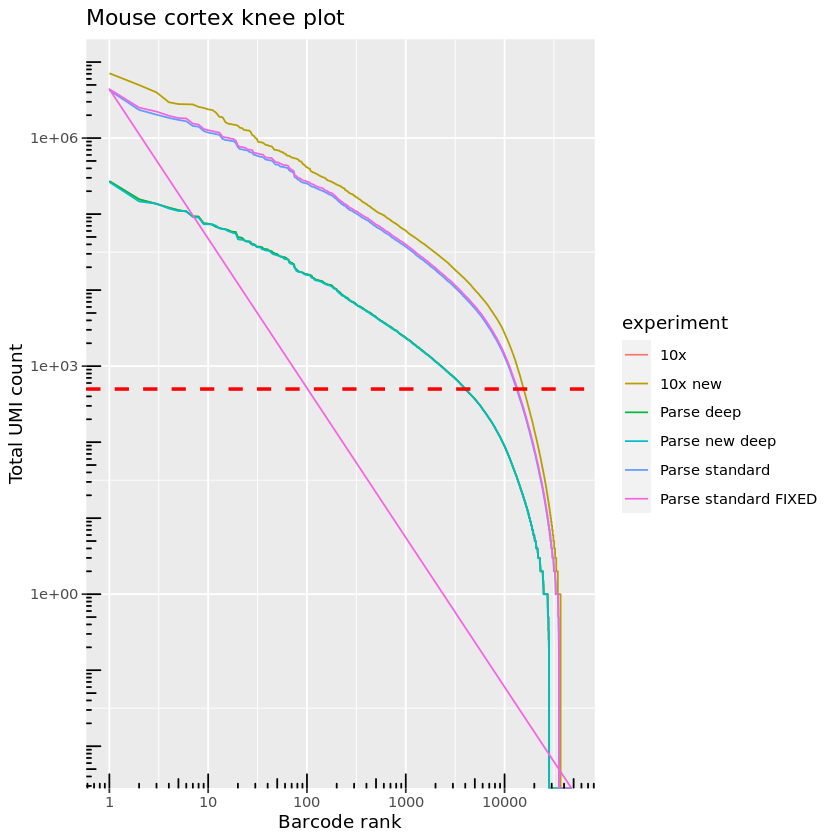

In [9]:
parse_standard_knee_plot = knee_df(parse_standard@assays$RNA@counts, "Parse standard")
parse_deep_knee_plot = knee_df(parse_deep@assays$RNA@counts, "Parse deep")
tenx_deep_knee_plot = knee_df(parse_deep@assays$RNA@counts, "10x")
parse_new_standard_knee_plot = knee_df(new_parse_shallow@assays$RNA@counts, "Parse standard FIXED")
parse_new_deep_knee_plot = knee_df(new_parse_deep@assays$RNA@counts, "Parse new deep")
tenx_new_standard_knee_plot = knee_df(new_10x@assays$RNA@counts, "10x new")


ggplot(rbind(parse_standard_knee_plot,parse_new_standard_knee_plot,parse_deep_knee_plot,tenx_deep_knee_plot,
            parse_new_standard_knee_plot, parse_new_deep_knee_plot,tenx_new_standard_knee_plot), 
       aes(rank, total, group = experiment, color = experiment)) +
geom_path() + 
scale_y_log10() + scale_x_log10() + annotation_logticks() +
labs(y = "Total UMI count", x = "Barcode rank", title = "Mouse cortex knee plot") + 
geom_hline(yintercept=500, linetype="dashed", color = "red", size=1)



In [10]:
new_parse_shallow
parse_standard

An object of class Seurat 
84008 features across 45958 samples within 3 assays 
Active assay: SCT (33301 features, 0 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
83829 features across 42937 samples within 3 assays 
Active assay: SCT (33108 features, 0 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [11]:
new_10x
orig_10x

An object of class Seurat 
84008 features across 63978 samples within 3 assays 
Active assay: SCT (33301 features, 0 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

An object of class Seurat 
83829 features across 54120 samples within 3 assays 
Active assay: SCT (33108 features, 0 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.

Warning message:
"`fun.y` is deprecated. Use `fun` instead."
Warning message:
"`fun.y` is deprecated. Use `fun` instead."


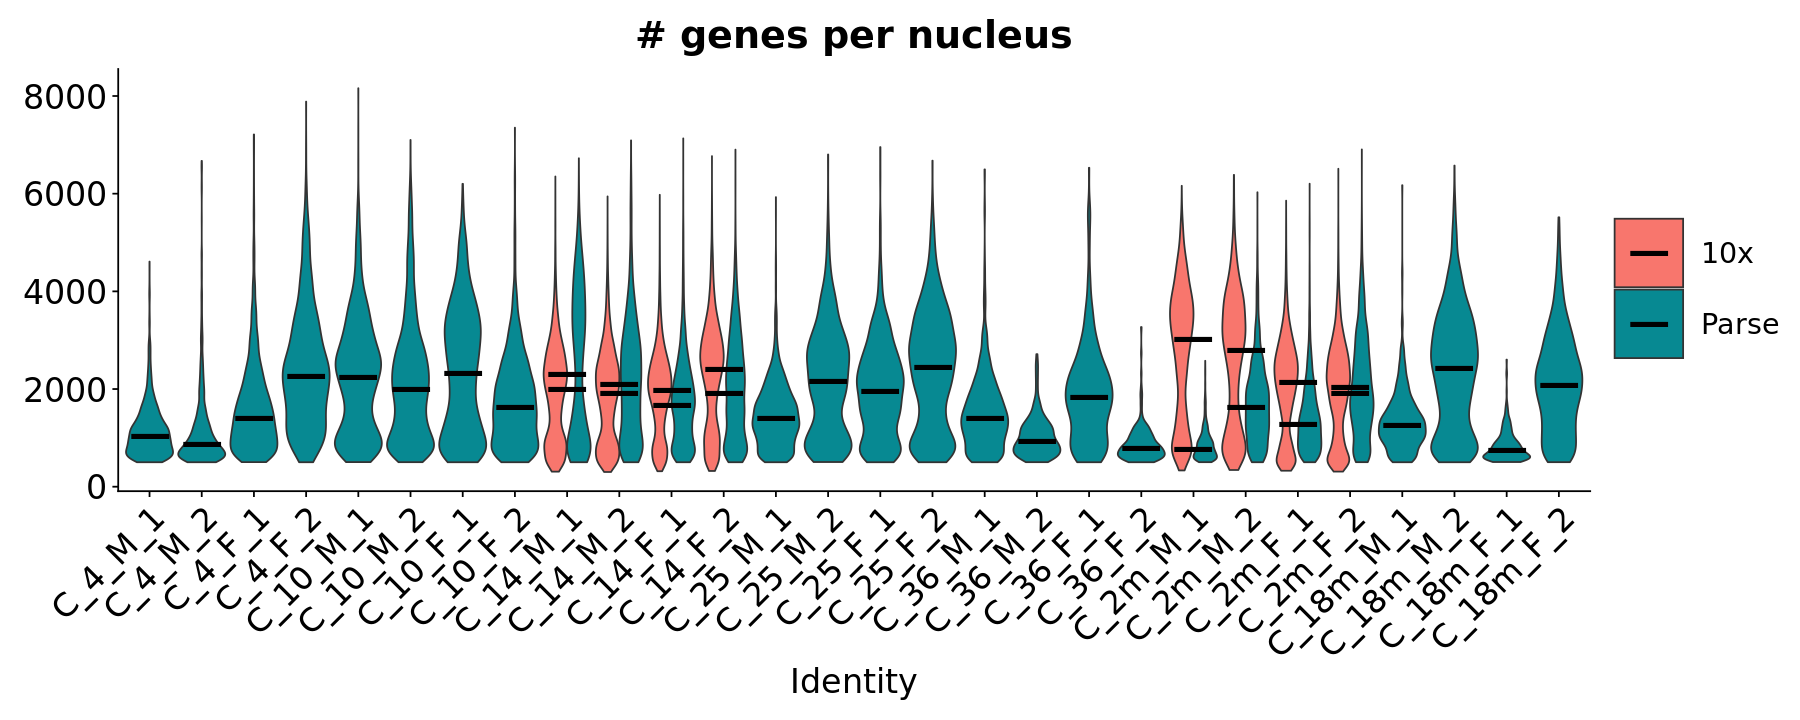

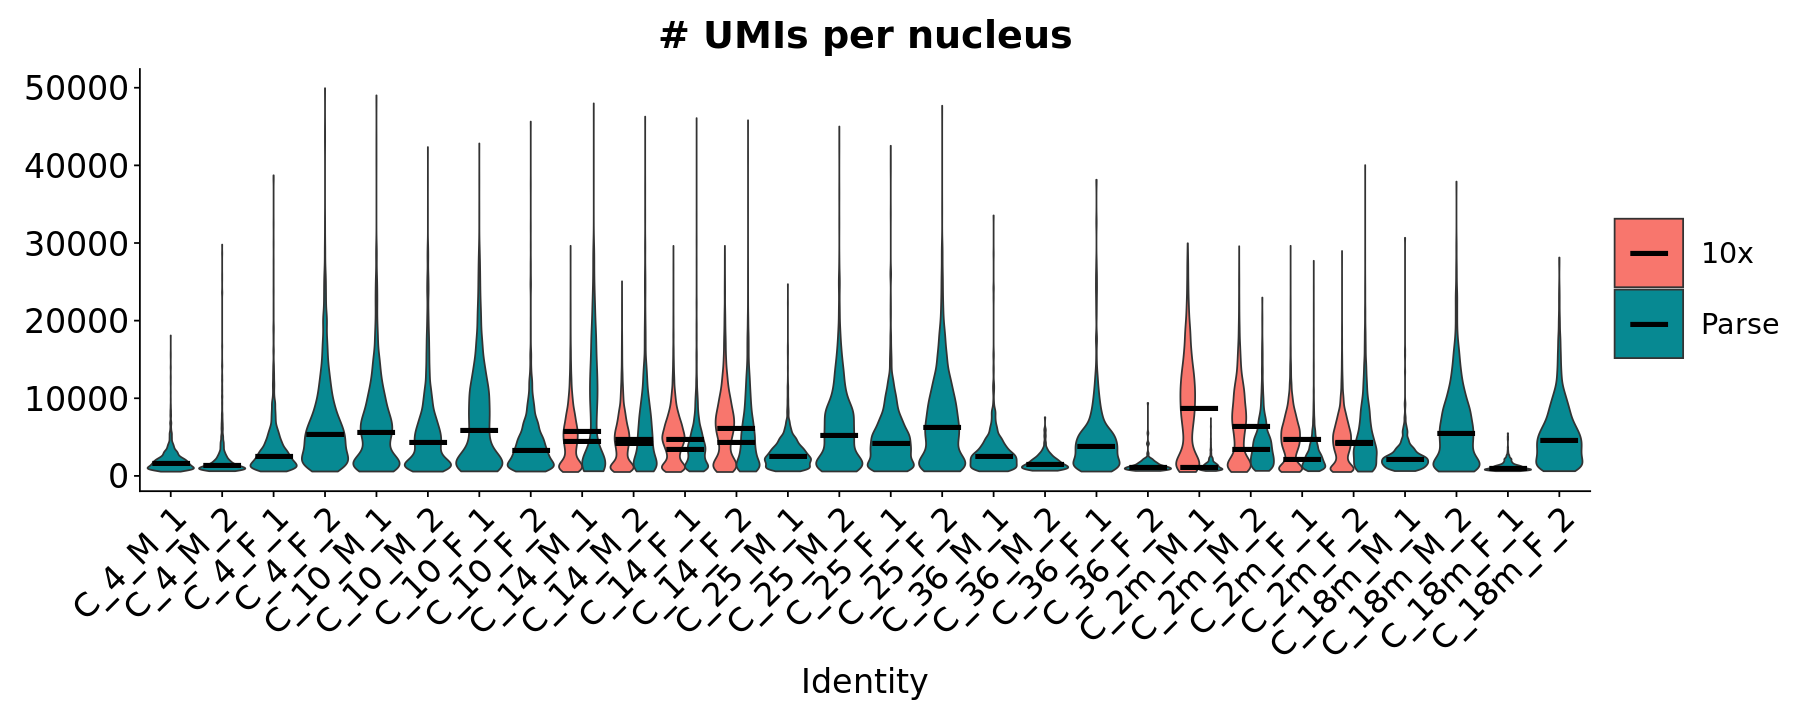

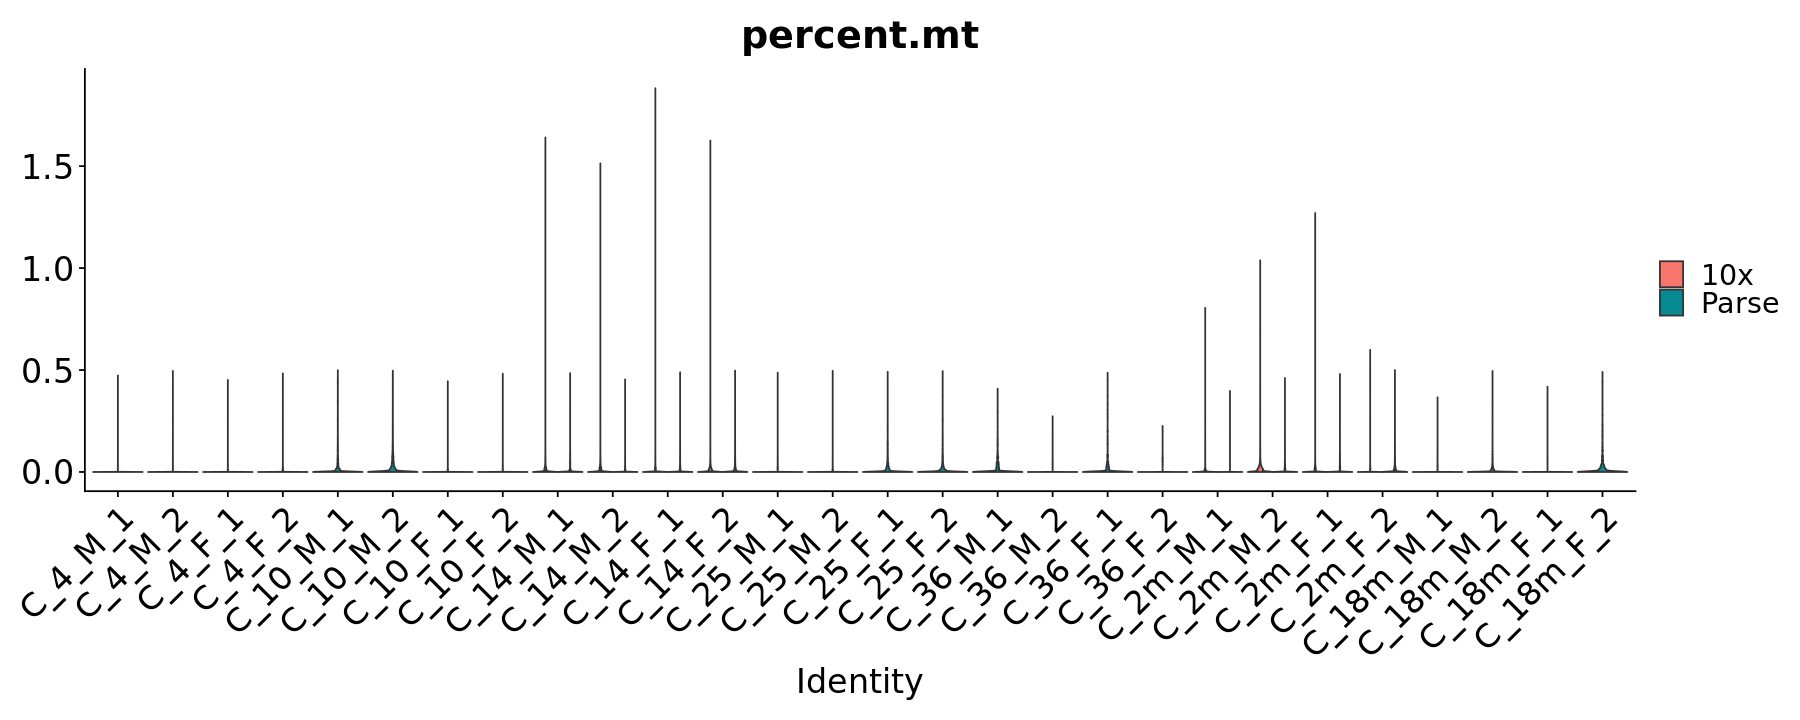

In [12]:
options(repr.plot.width = 15, repr.plot.height = 6)

VlnPlot(obj, features = c("nFeature_RNA"), ncol = 1, split.by = "technology",
        pt.size = 0, group.by = "sample")+ ggtitle("# genes per nucleus") +
stat_summary(fun.y = median, geom='point', size = 15, colour = "black", shape = 95) & theme(text = element_text(size = 20), 
                                                                              axis.text.x = element_text(size = 20), 
                                                                              axis.text.y = element_text(size = 20))

VlnPlot(obj, features = c("nCount_RNA"), ncol = 1, split.by = "technology",
        pt.size = 0, group.by = "sample") + ggtitle("# UMIs per nucleus") +
stat_summary(fun.y = median, geom='point', size = 15, colour = "black", shape = 95)& theme(text = element_text(size = 20), 
                                                  axis.text.x = element_text(size = 20), 
                                                  axis.text.y = element_text(size = 20))

VlnPlot(obj, features = c("percent.mt"), ncol = 1, split.by = "technology",
        pt.size = 0, group.by = "sample") & theme(text = element_text(size = 20), 
                                                  axis.text.x = element_text(size = 20), 
                                                  axis.text.y = element_text(size = 20))

## UMAP "Feature Plots" of QC metadata

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already pres

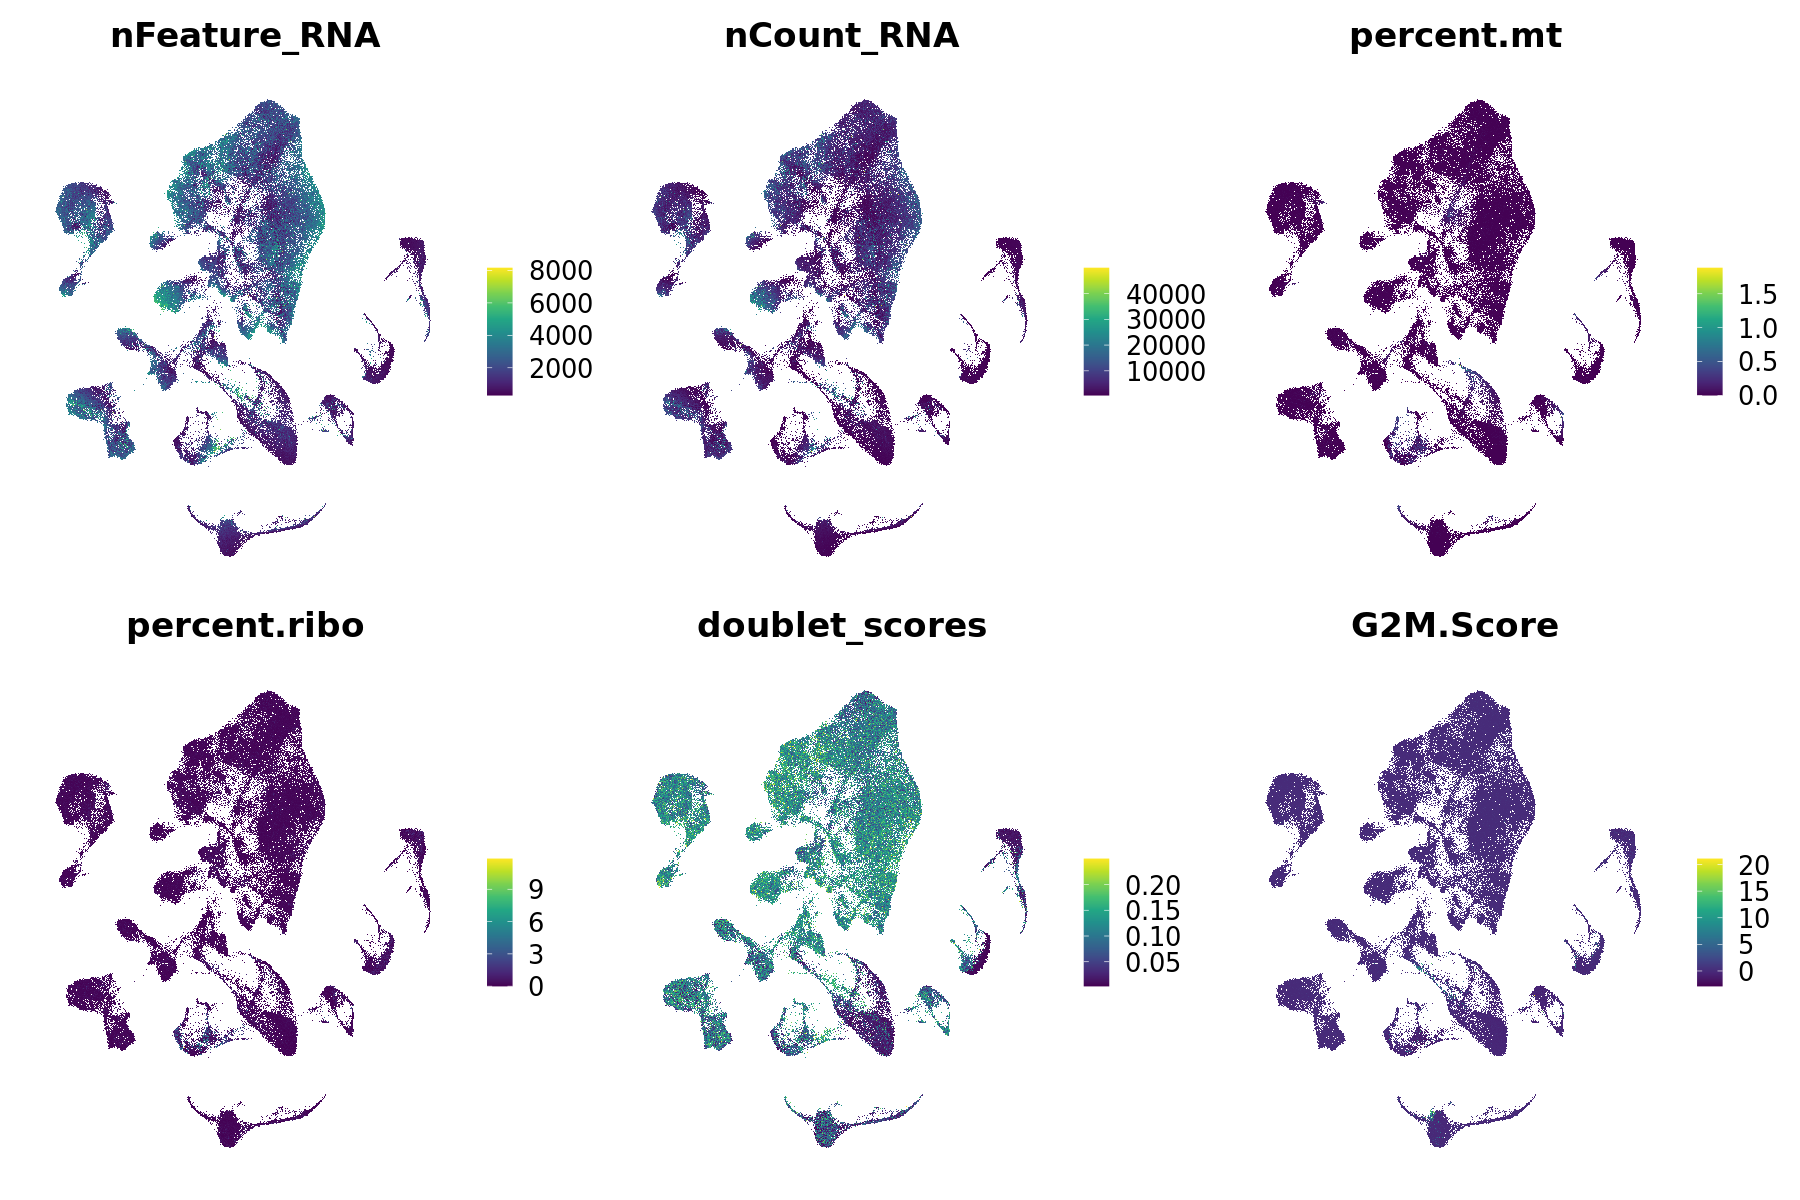

In [13]:
options(repr.plot.width = 15, repr.plot.height = 10)

FeaturePlot(obj, pt.size = 0.1,
            features =c("nFeature_RNA",
                        "nCount_RNA",
                        "percent.mt",
                        "percent.ribo",
                        "doublet_scores",
                        "G2M.Score"), ncol =3)  & scale_colour_gradientn(colours = viridis(11)) & 
                        NoAxes()& 
                        theme(text = element_text(size = 18))



# Check integration and clustering

In [14]:
nclusters = length(unique(obj$seurat_clusters))
cluster_cols = colorRampPalette(brewer.pal(9,"Set1"))(nclusters)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



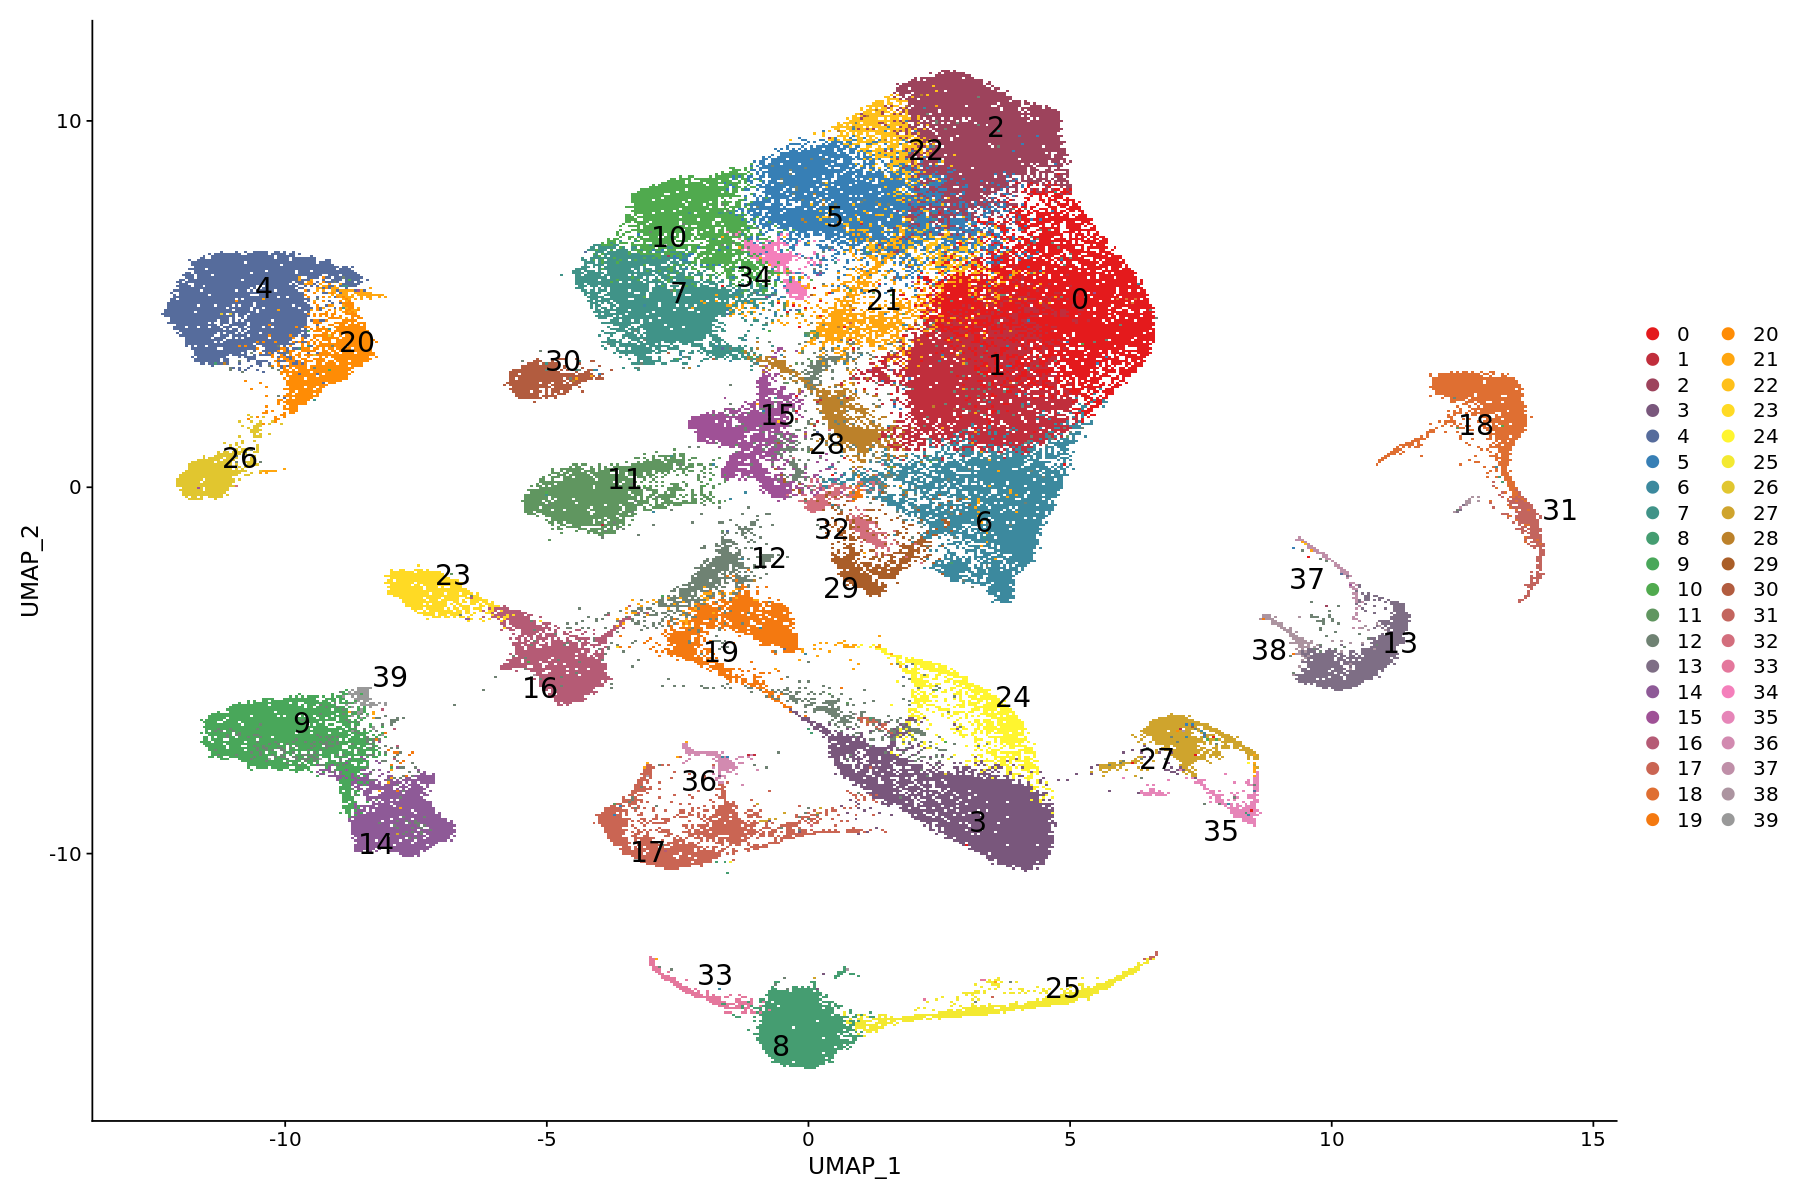

In [15]:
options(repr.plot.width = 15, repr.plot.height = 10)

DimPlot(obj, reduction = "umap", label = TRUE, label.size=6,repel = TRUE, cols = cluster_cols)



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



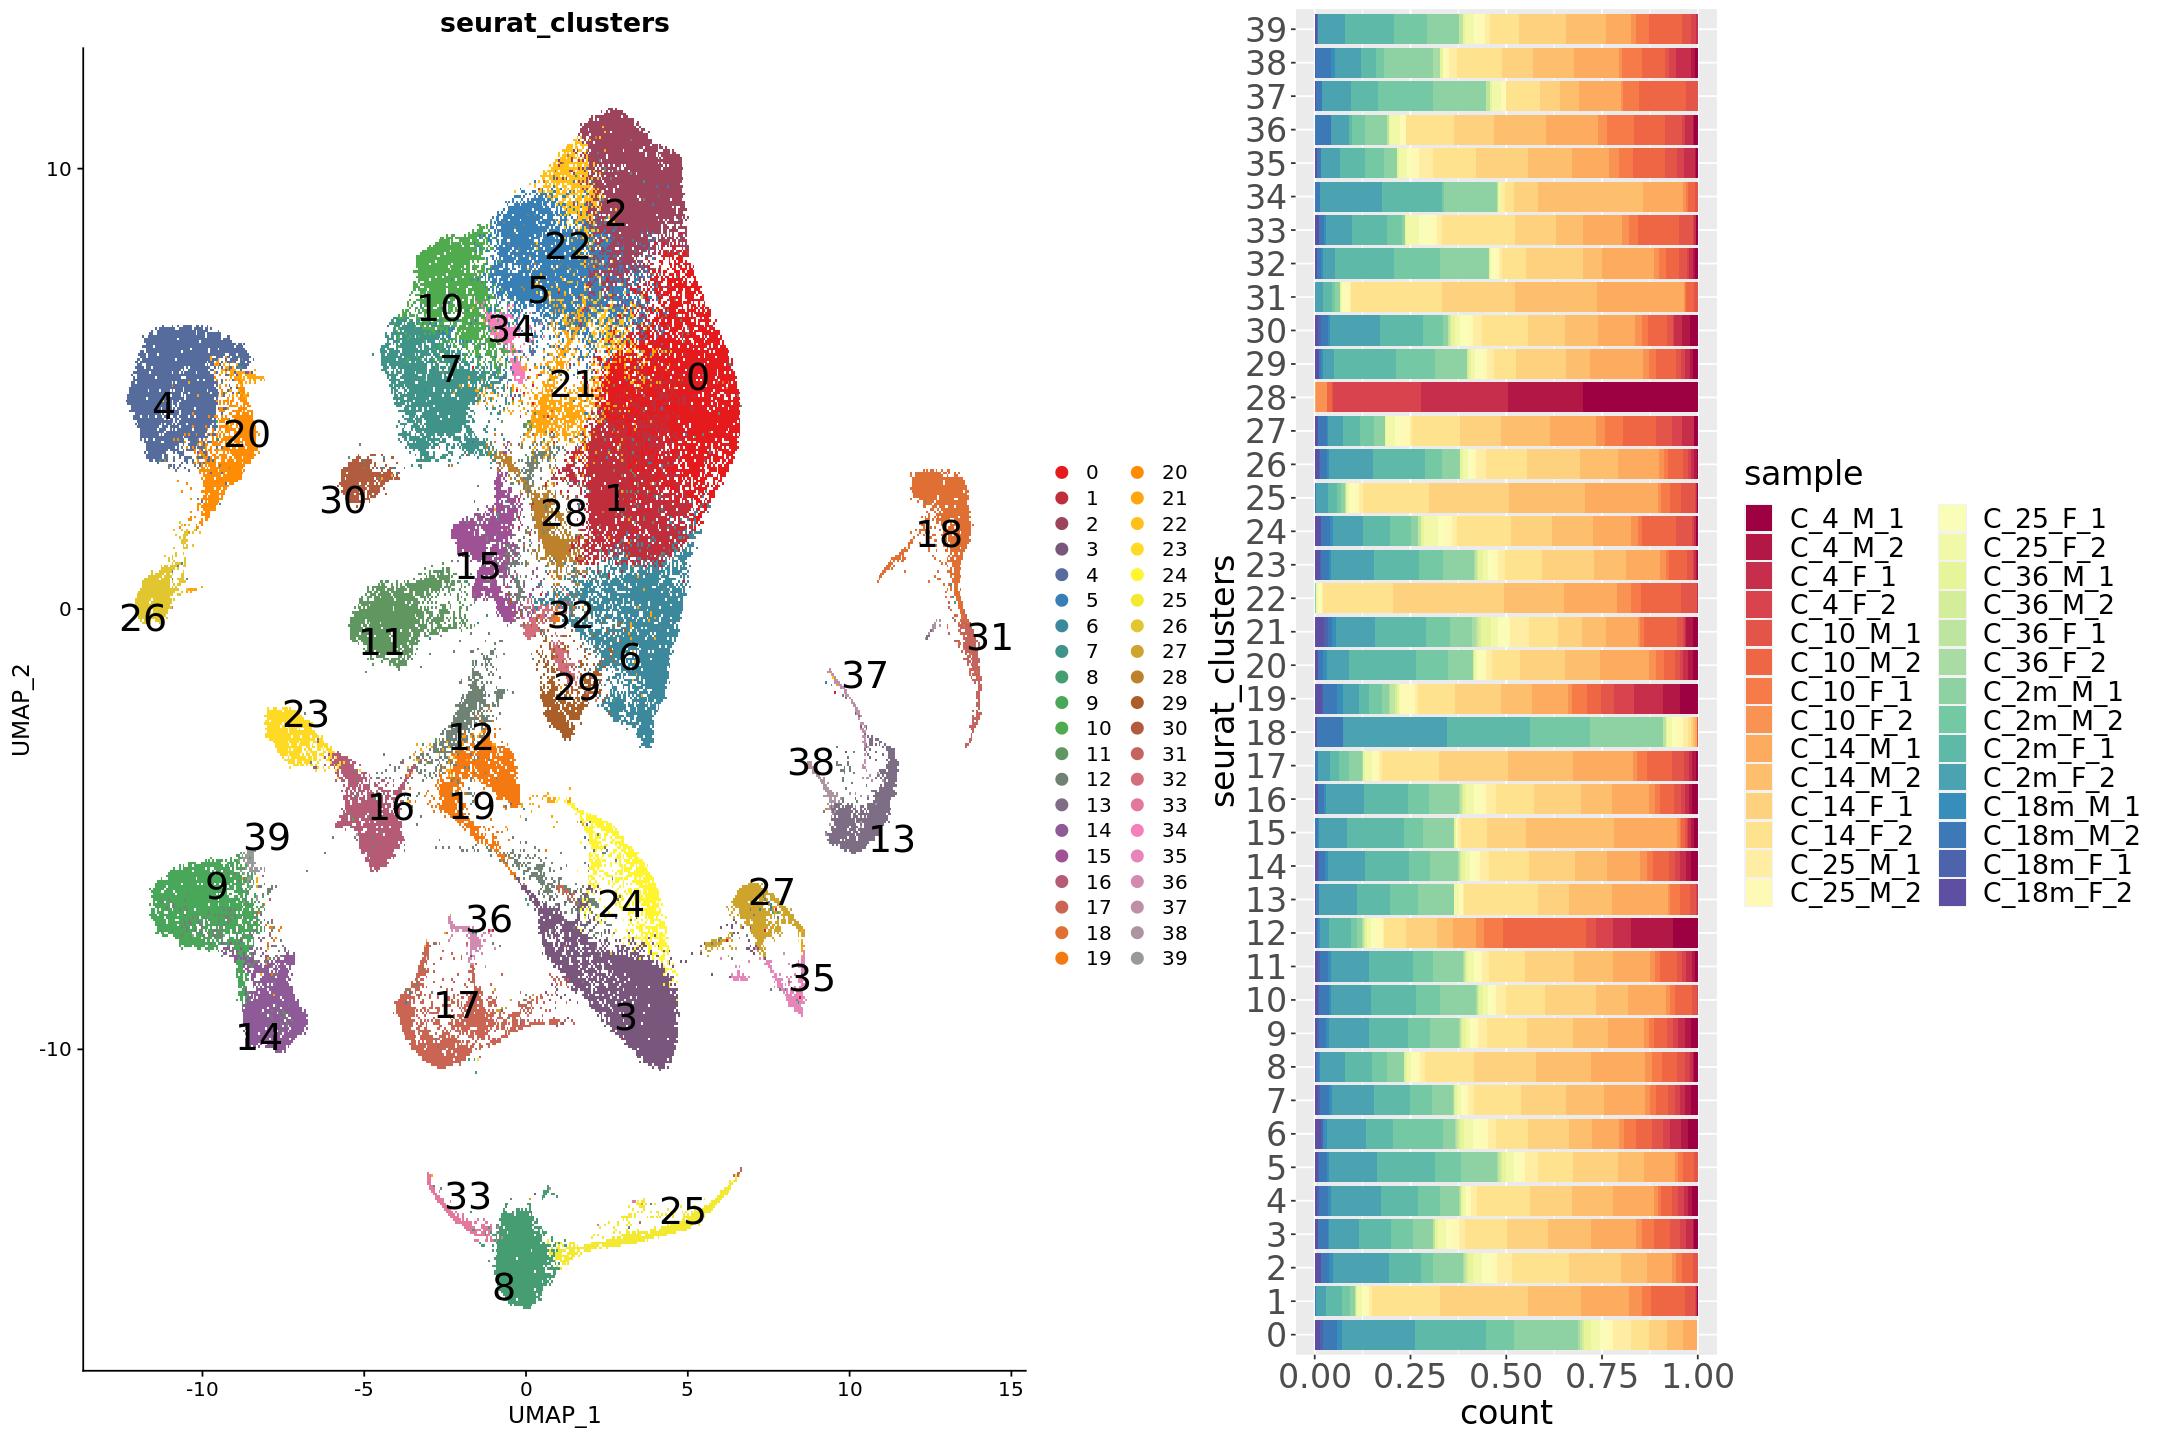

In [16]:
options(repr.plot.width = 18, repr.plot.height = 12)

p1=DimPlot(obj, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 8, repel = TRUE, 
          cols = cluster_cols)
p2=ggplot(obj@meta.data, aes(x=seurat_clusters, fill=sample)) + geom_bar(position = "fill") +
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), 
      axis.text.y = element_text(size = 20)) + scale_fill_manual(values = sample_cols) & coord_flip()
gridExtra::grid.arrange(
  p1, p2,
  widths = c(2,1.6),
  layout_matrix = rbind(c(1, 2)))


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



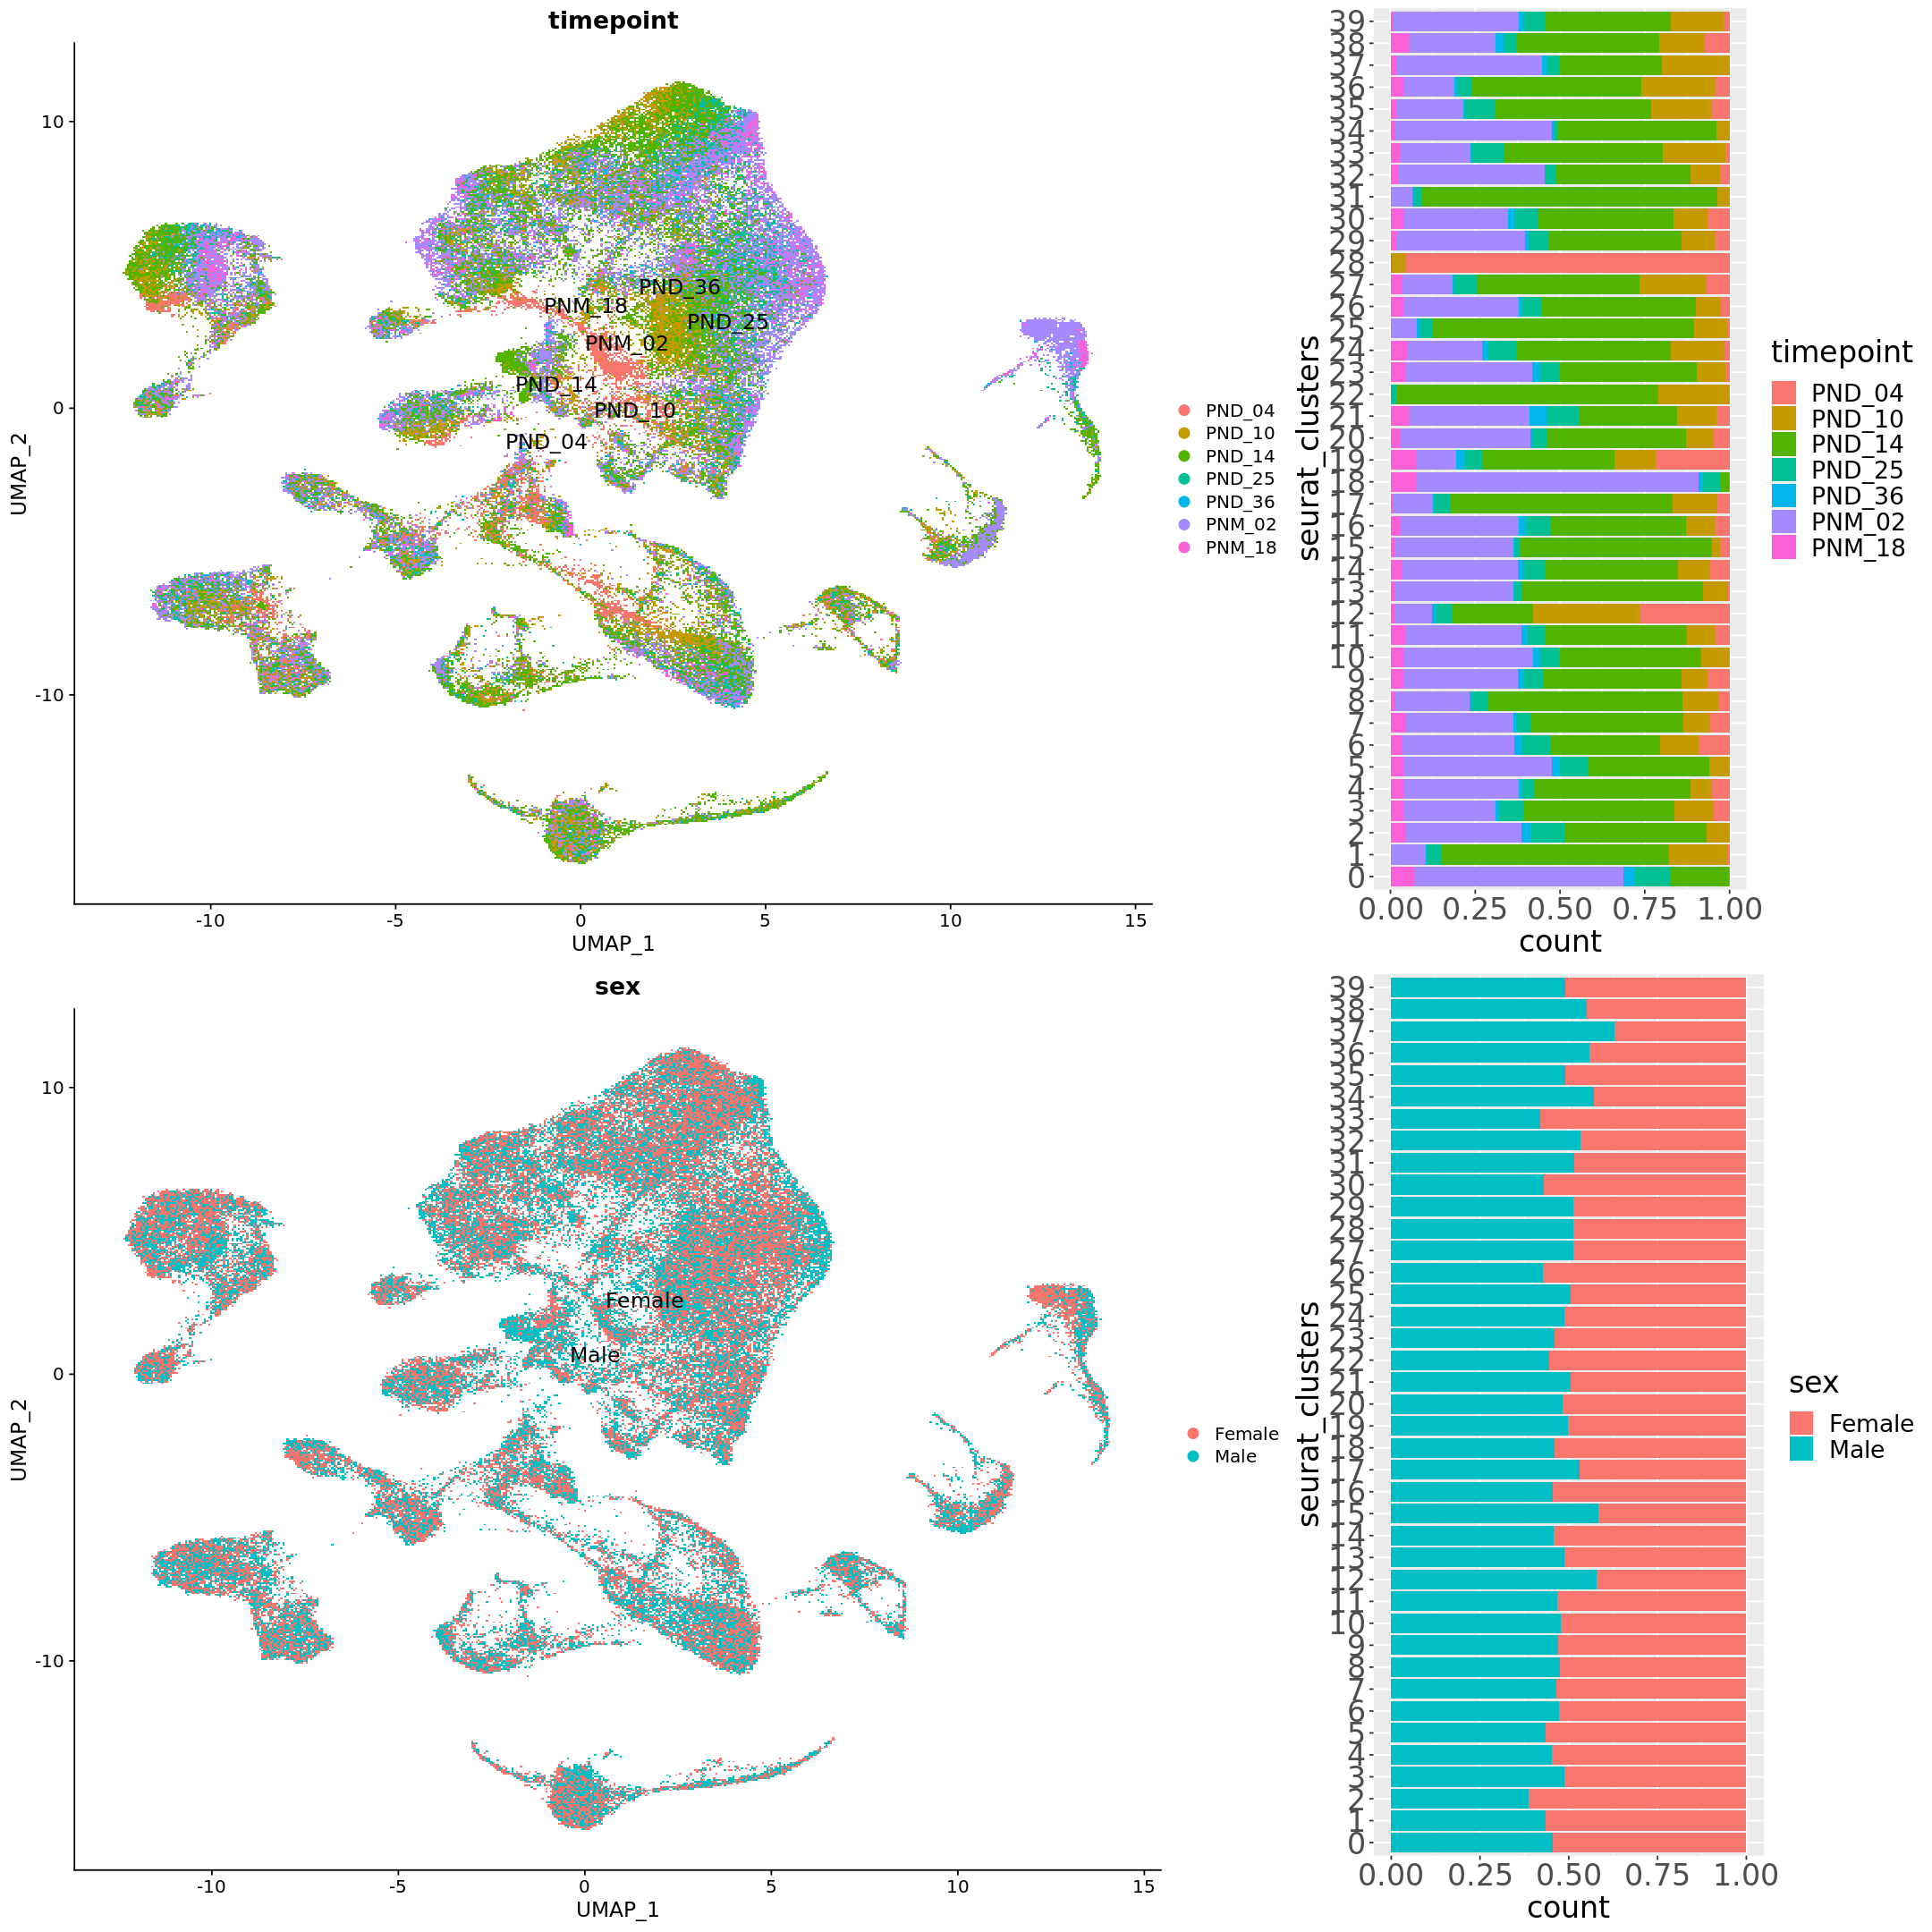

In [17]:
options(repr.plot.width = 18, repr.plot.height = 18)


p1=DimPlot(obj, reduction = "umap", group.by = "timepoint", label = TRUE, label.size = 5, repel = TRUE)
p2 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=timepoint)) + geom_bar(position = "fill") & 
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()

p3=DimPlot(obj, reduction = "umap", group.by = "sex", label = TRUE, label.size = 5, repel = TRUE, shuffle = T)
p4 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=sex)) + geom_bar(position = "fill") & 
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()
gridExtra::grid.arrange(
  p1, p2, p3, p4,
  widths = c(2,1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 4)))



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



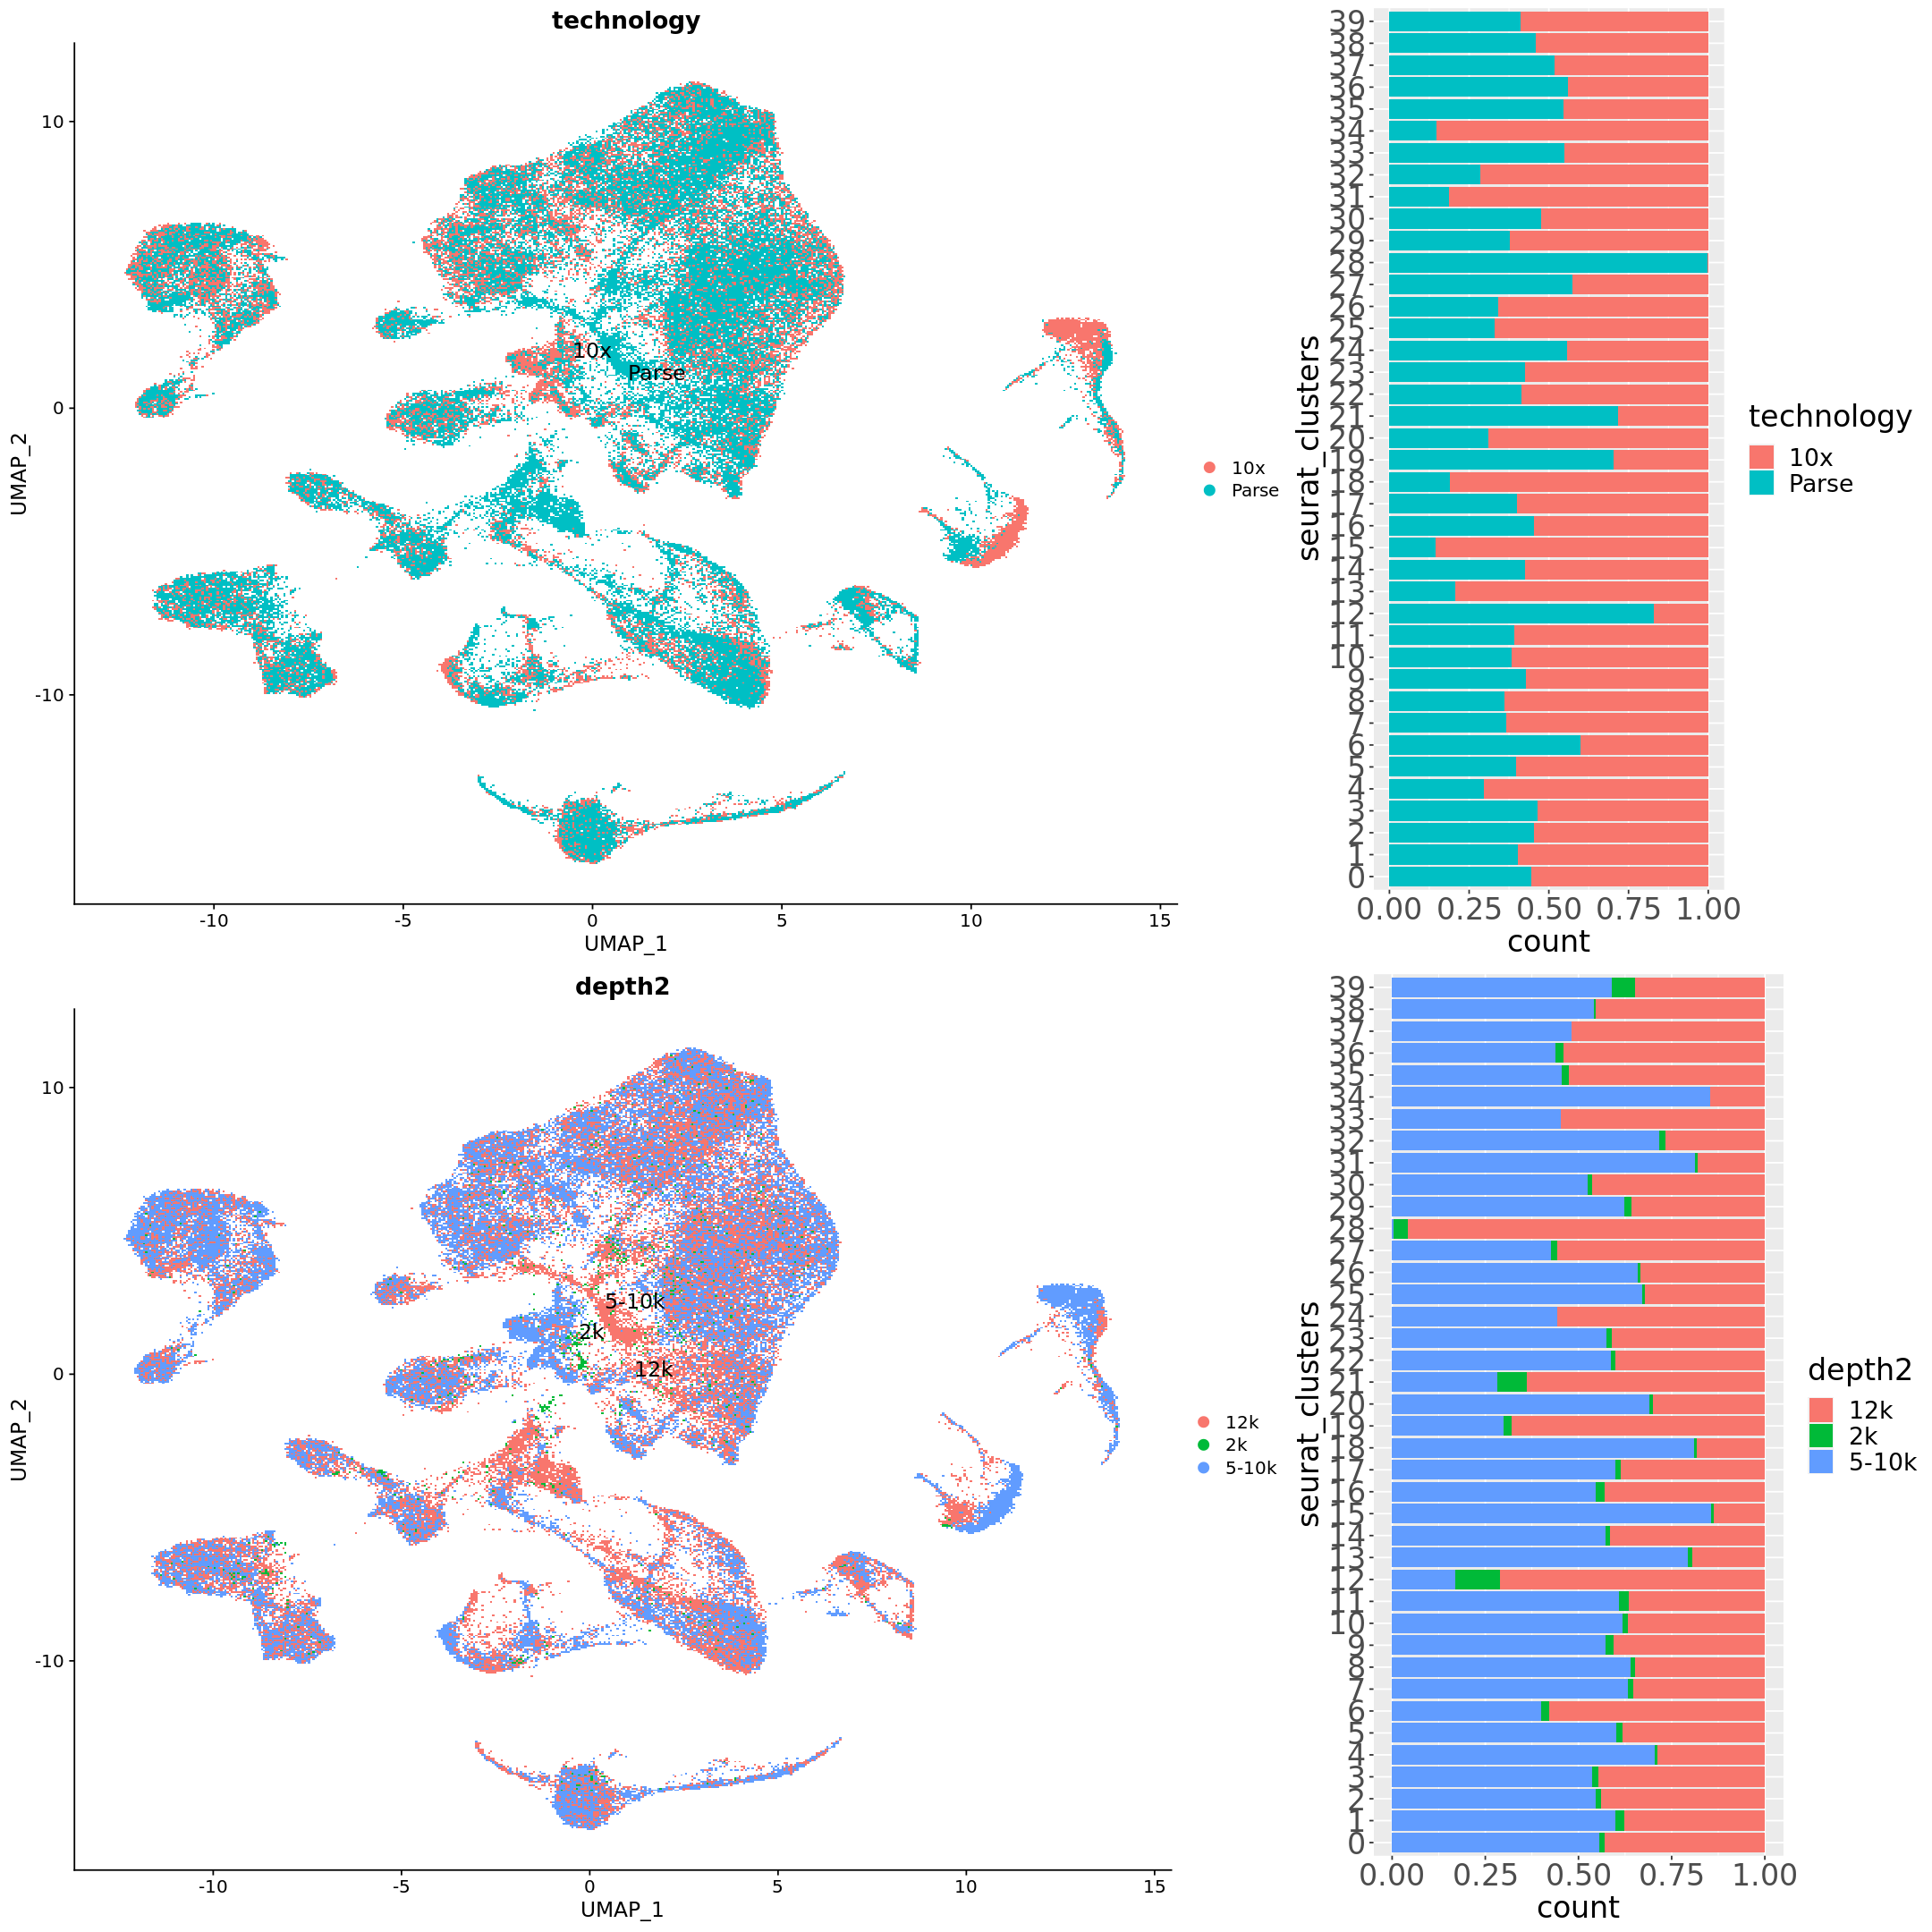

In [18]:
options(repr.plot.width = 18, repr.plot.height = 18)


p1=DimPlot(obj, reduction = "umap", group.by = "technology", label = TRUE, label.size = 5, repel = TRUE)
p2 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=technology)) + geom_bar(position = "fill") & 
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()

p3=DimPlot(obj, reduction = "umap", group.by = "depth2", label = TRUE, label.size = 5, repel = TRUE, shuffle = T)
p4 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=depth2)) + geom_bar(position = "fill") & 
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()
gridExtra::grid.arrange(
  p1, p2, p3, p4,
  widths = c(2,1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 4)))



In [6]:
obj = predict_celltypes(obj, combined.sct, "subtypes", "encode_predictions")

Warning message:
"29964 features of the features specified were not present in both the reference query assays. 
Continuing with remaining 3000 features."


In [7]:
predcols = set1_cols(obj@meta.data,"seurat_clusters")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 18 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


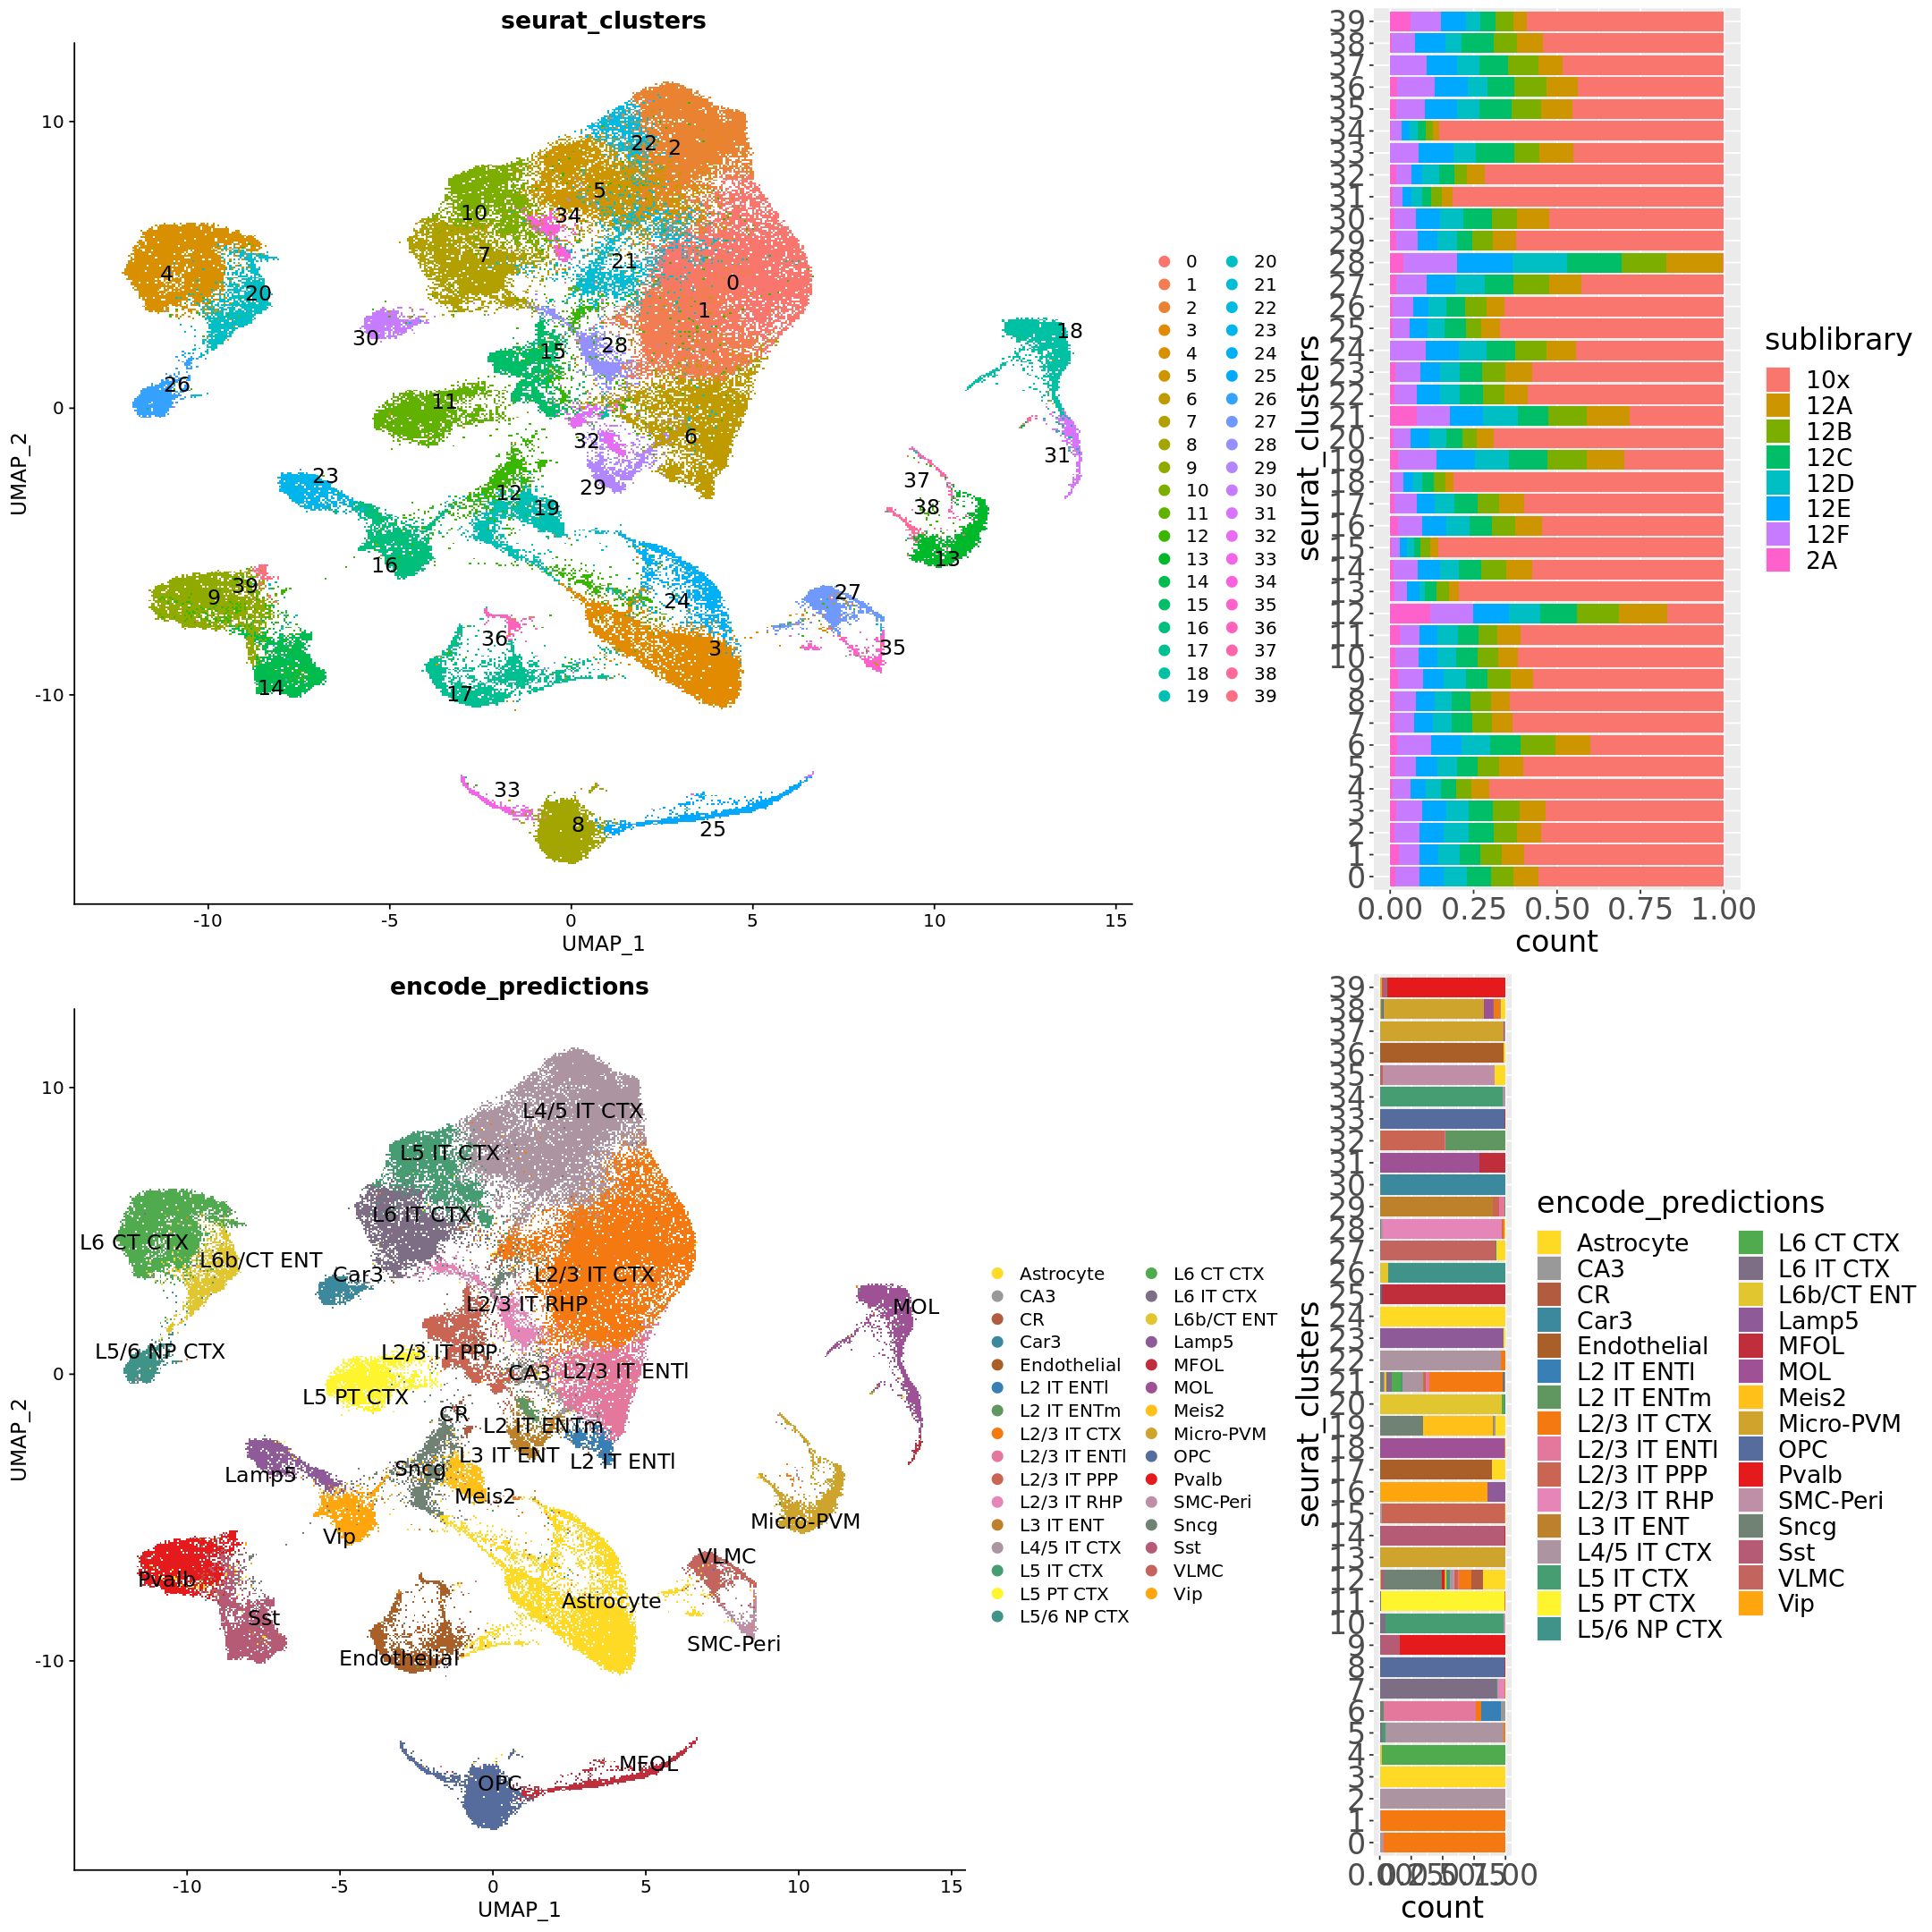

In [8]:
options(repr.plot.width = 18, repr.plot.height = 18)


p1=DimPlot(obj, reduction = "umap", group.by = "seurat_clusters", label = TRUE, label.size = 5, repel = TRUE)
p2 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=sublibrary)) + geom_bar(position = "fill") & 
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()

p3=DimPlot(obj, reduction = "umap", group.by = "encode_predictions", cols=predcols,label = TRUE, label.size = 5, repel = TRUE, shuffle = T)
p4 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=encode_predictions))+ scale_fill_manual(values = predcols) + geom_bar(position = "fill") & 
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()
gridExtra::grid.arrange(
  p1, p2, p3, p4,
  widths = c(2,1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 4)))



# Celltype annotation

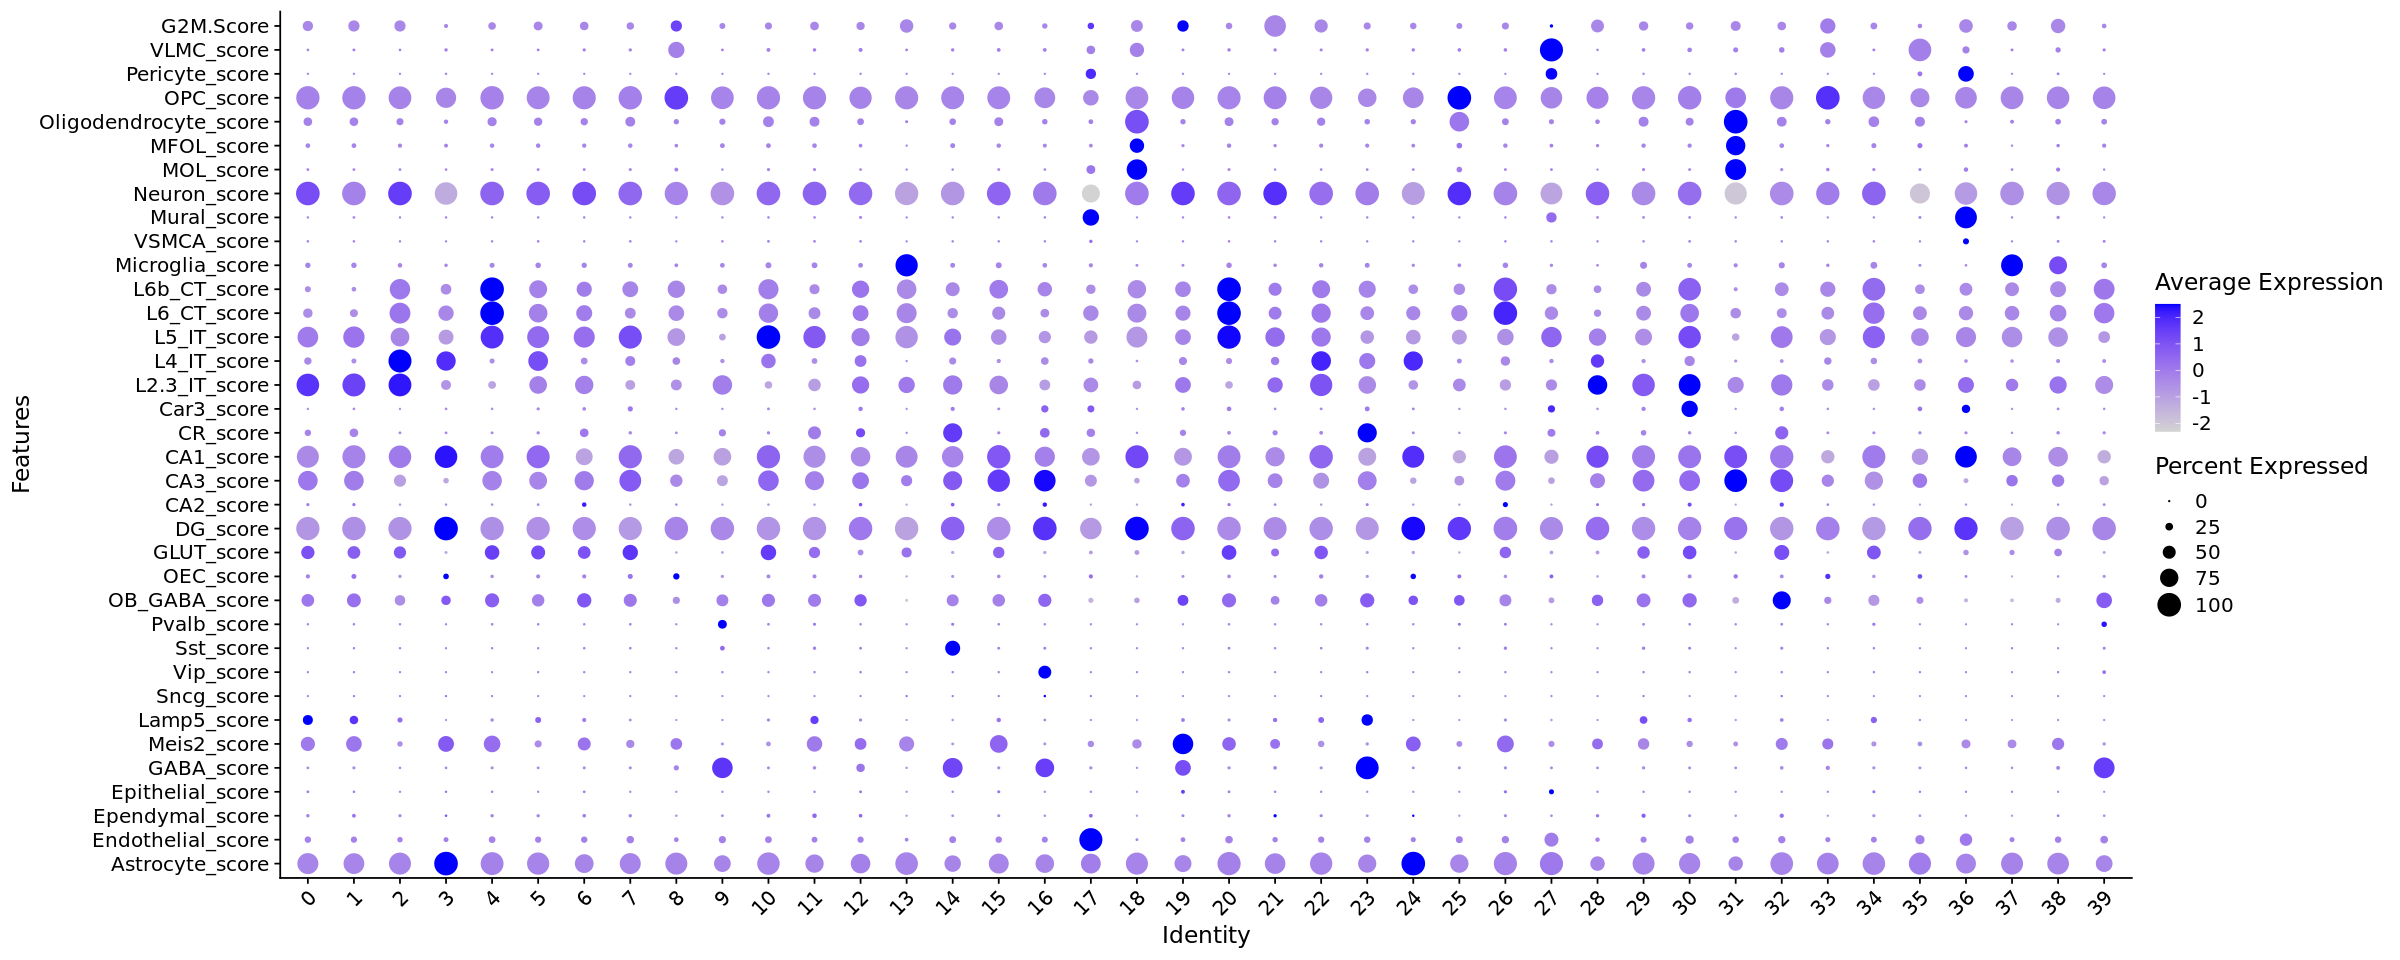

In [6]:
DefaultAssay(obj) = "SCT"
markers = read.csv("../ref/IGVF_curated_markers.csv")
markers = markers[markers$Tissue == "Cortex/Hippocampus",]
markers = markers[markers$Gene %in% rownames(obj),]

for (celltype in unique(markers$Subtype)){
    label = paste0(celltype,"_score")
    genes = unique(markers$Gene[markers$Subtype == celltype])
    obj[[label]] = PercentageFeatureSet(obj,features = genes)
    
}
options(repr.plot.width = 20, repr.plot.height= 8)

Idents(obj) = obj$seurat_clusters
DotPlot(obj, features =  c(paste0(unique(markers$Subtype),"_score"),"G2M.Score"))+ 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) & coord_flip() 


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Addin

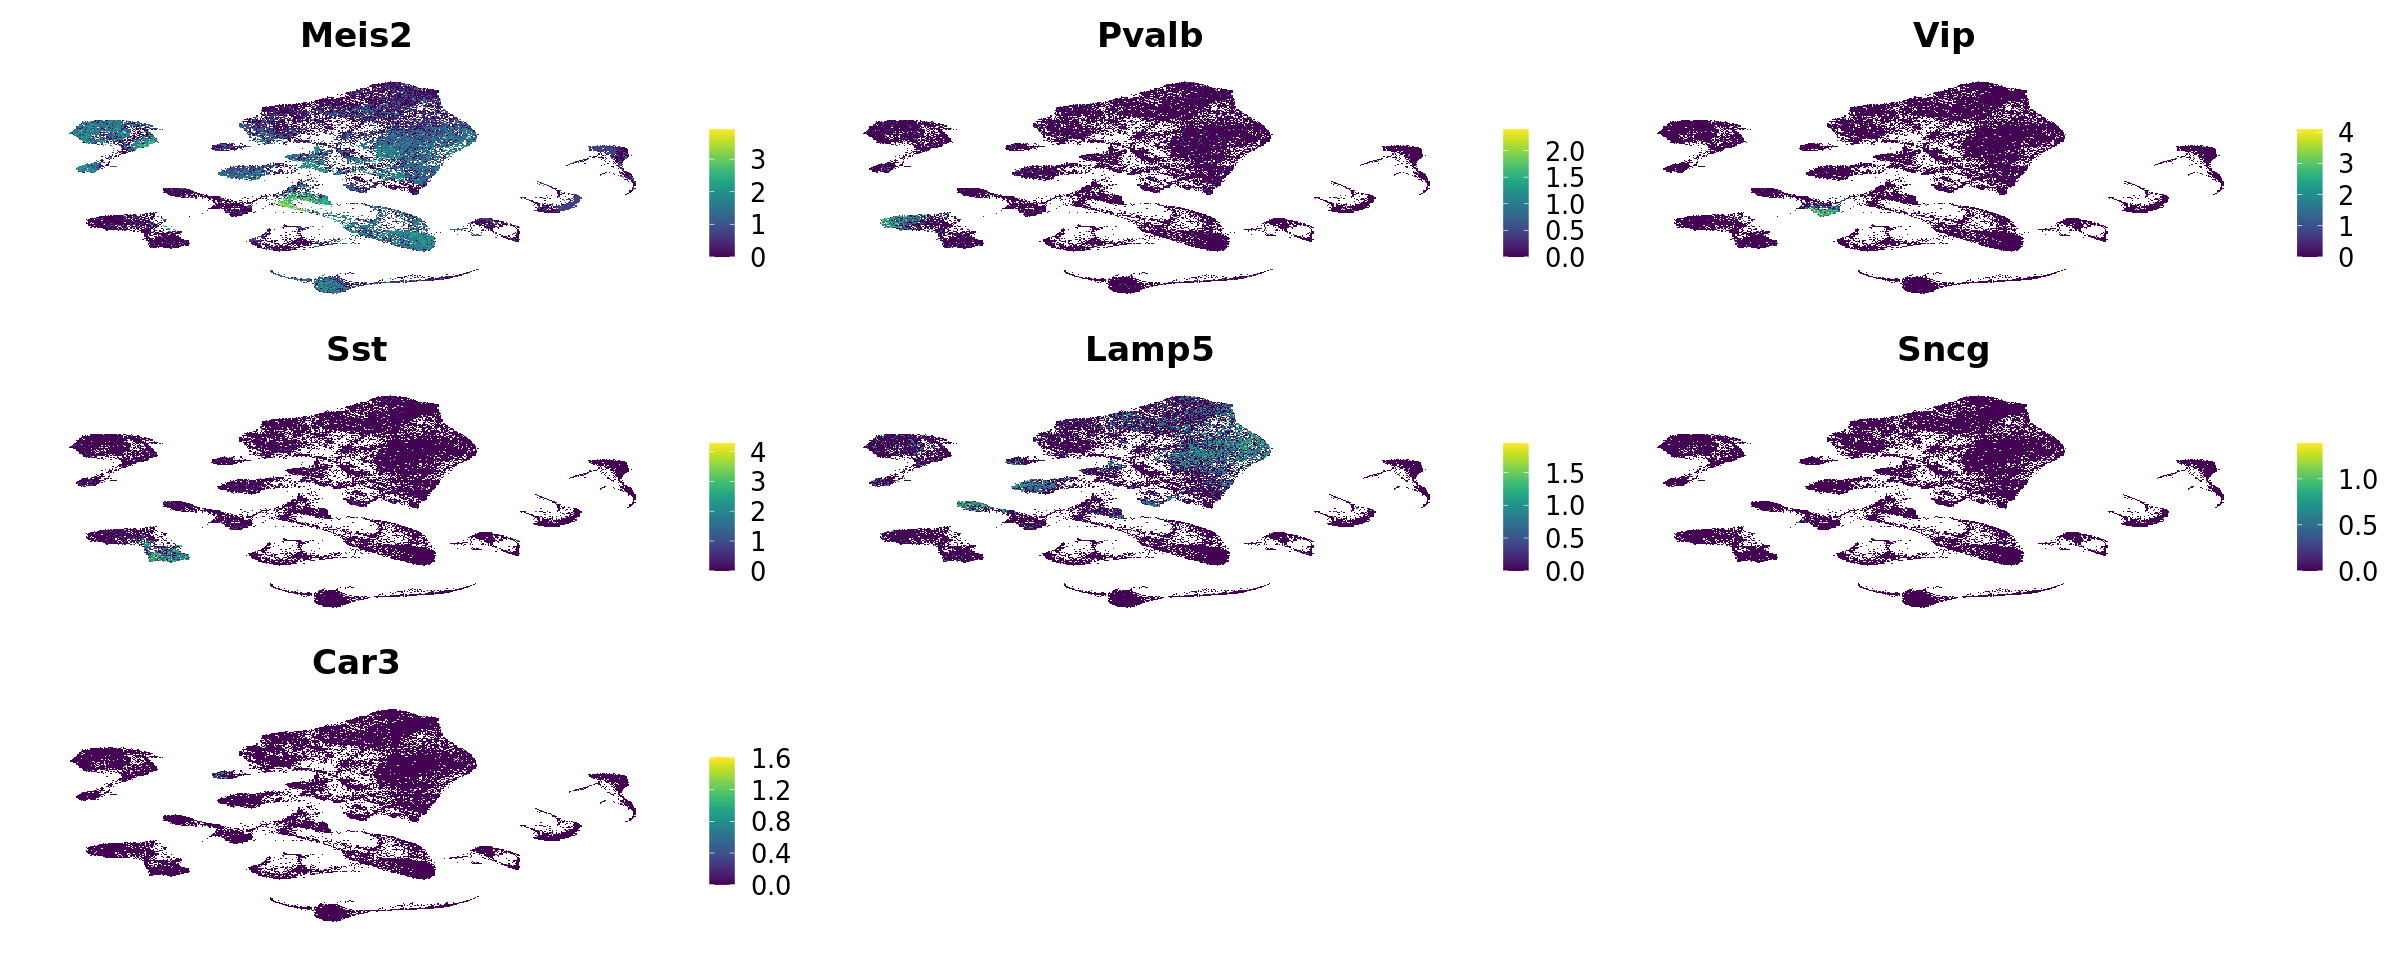

In [39]:
options(repr.plot.width = 20, repr.plot.height= 8)

DefaultAssay(obj) = "SCT"
featureplot(obj,c("Meis2","Pvalb","Vip","Sst","Lamp5","Sncg","Car3"))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another 

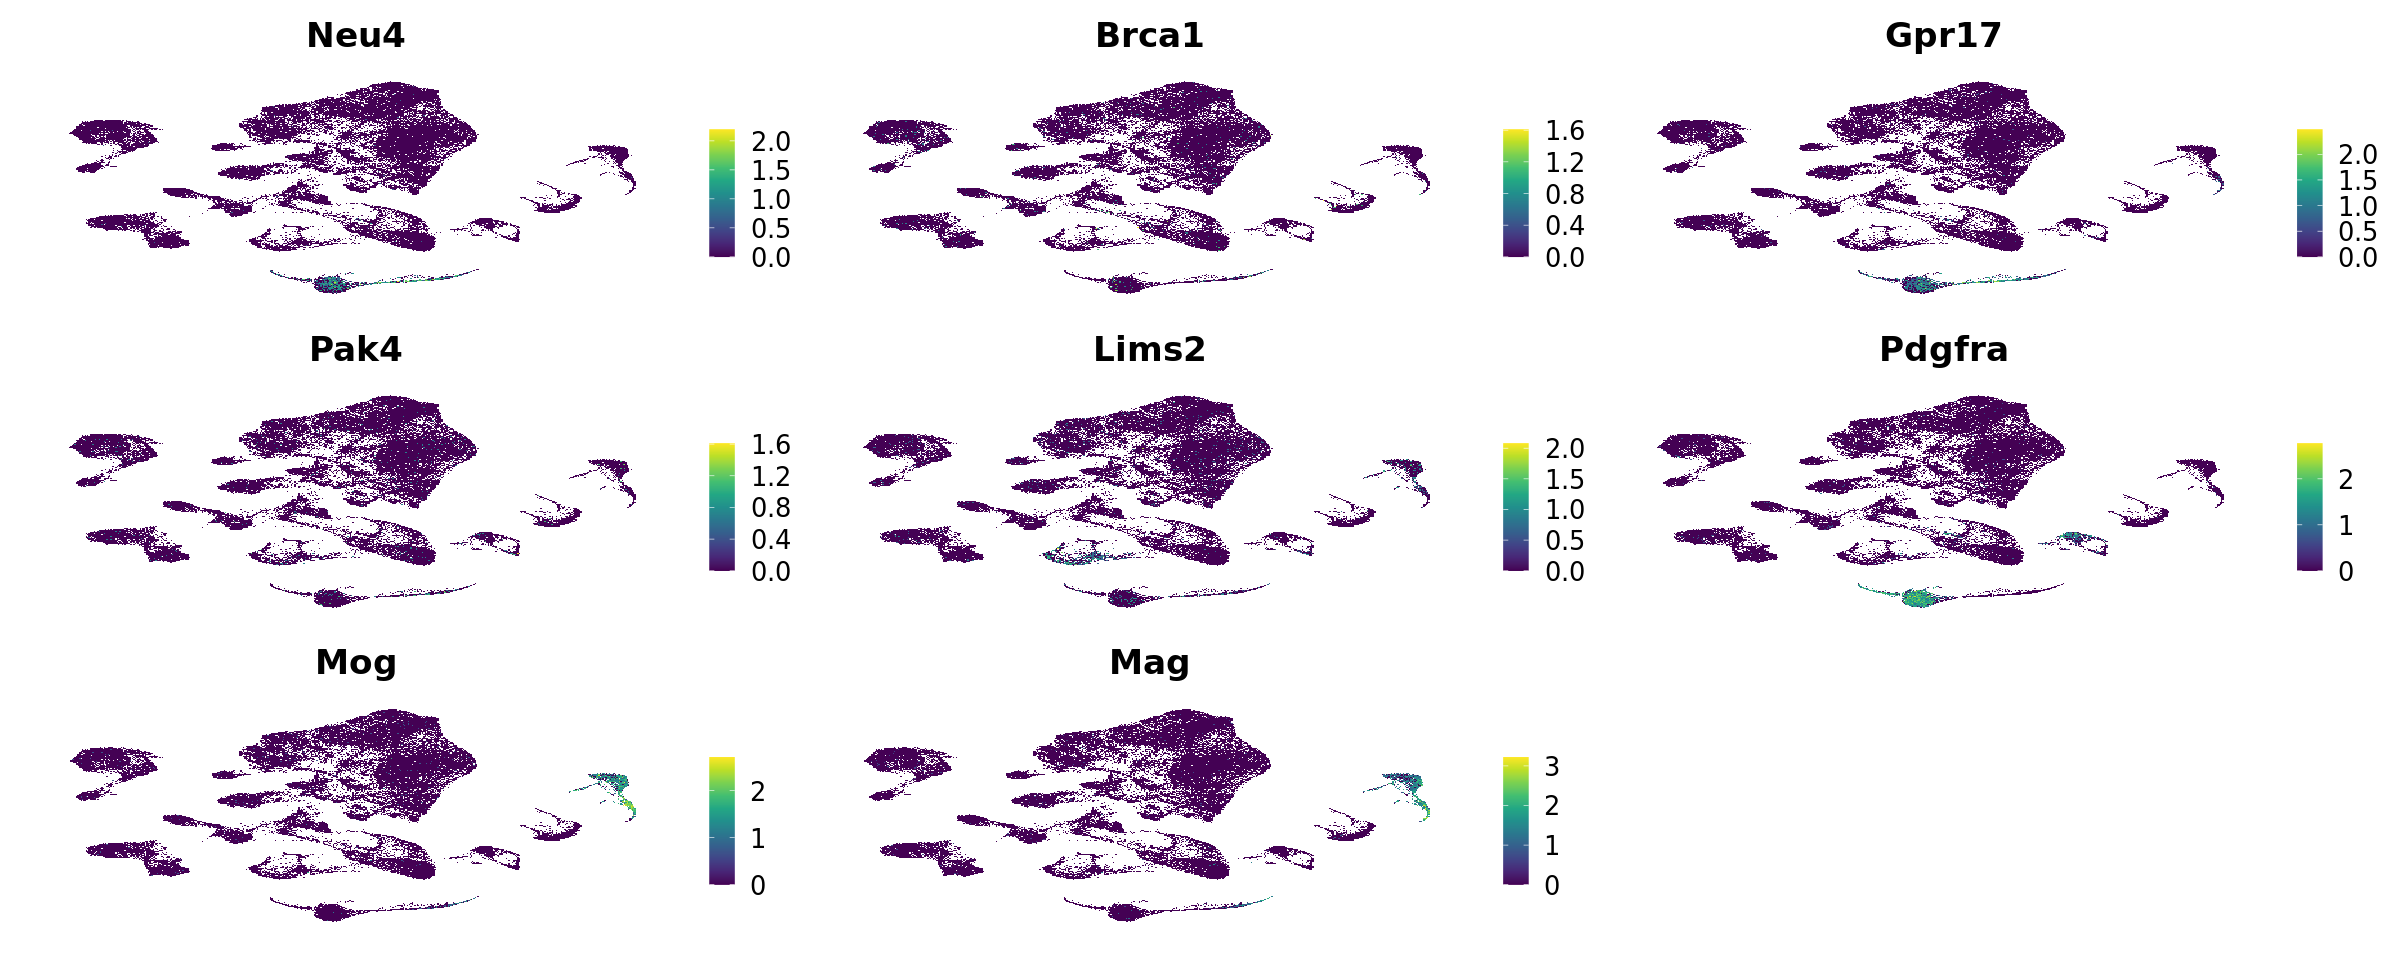

In [44]:

DefaultAssay(obj) = "SCT"
featureplot(obj,c("Neu4","Brca1","Gpr17","Pak4","Lims2","Pdgfra","Mog","Mag"))

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



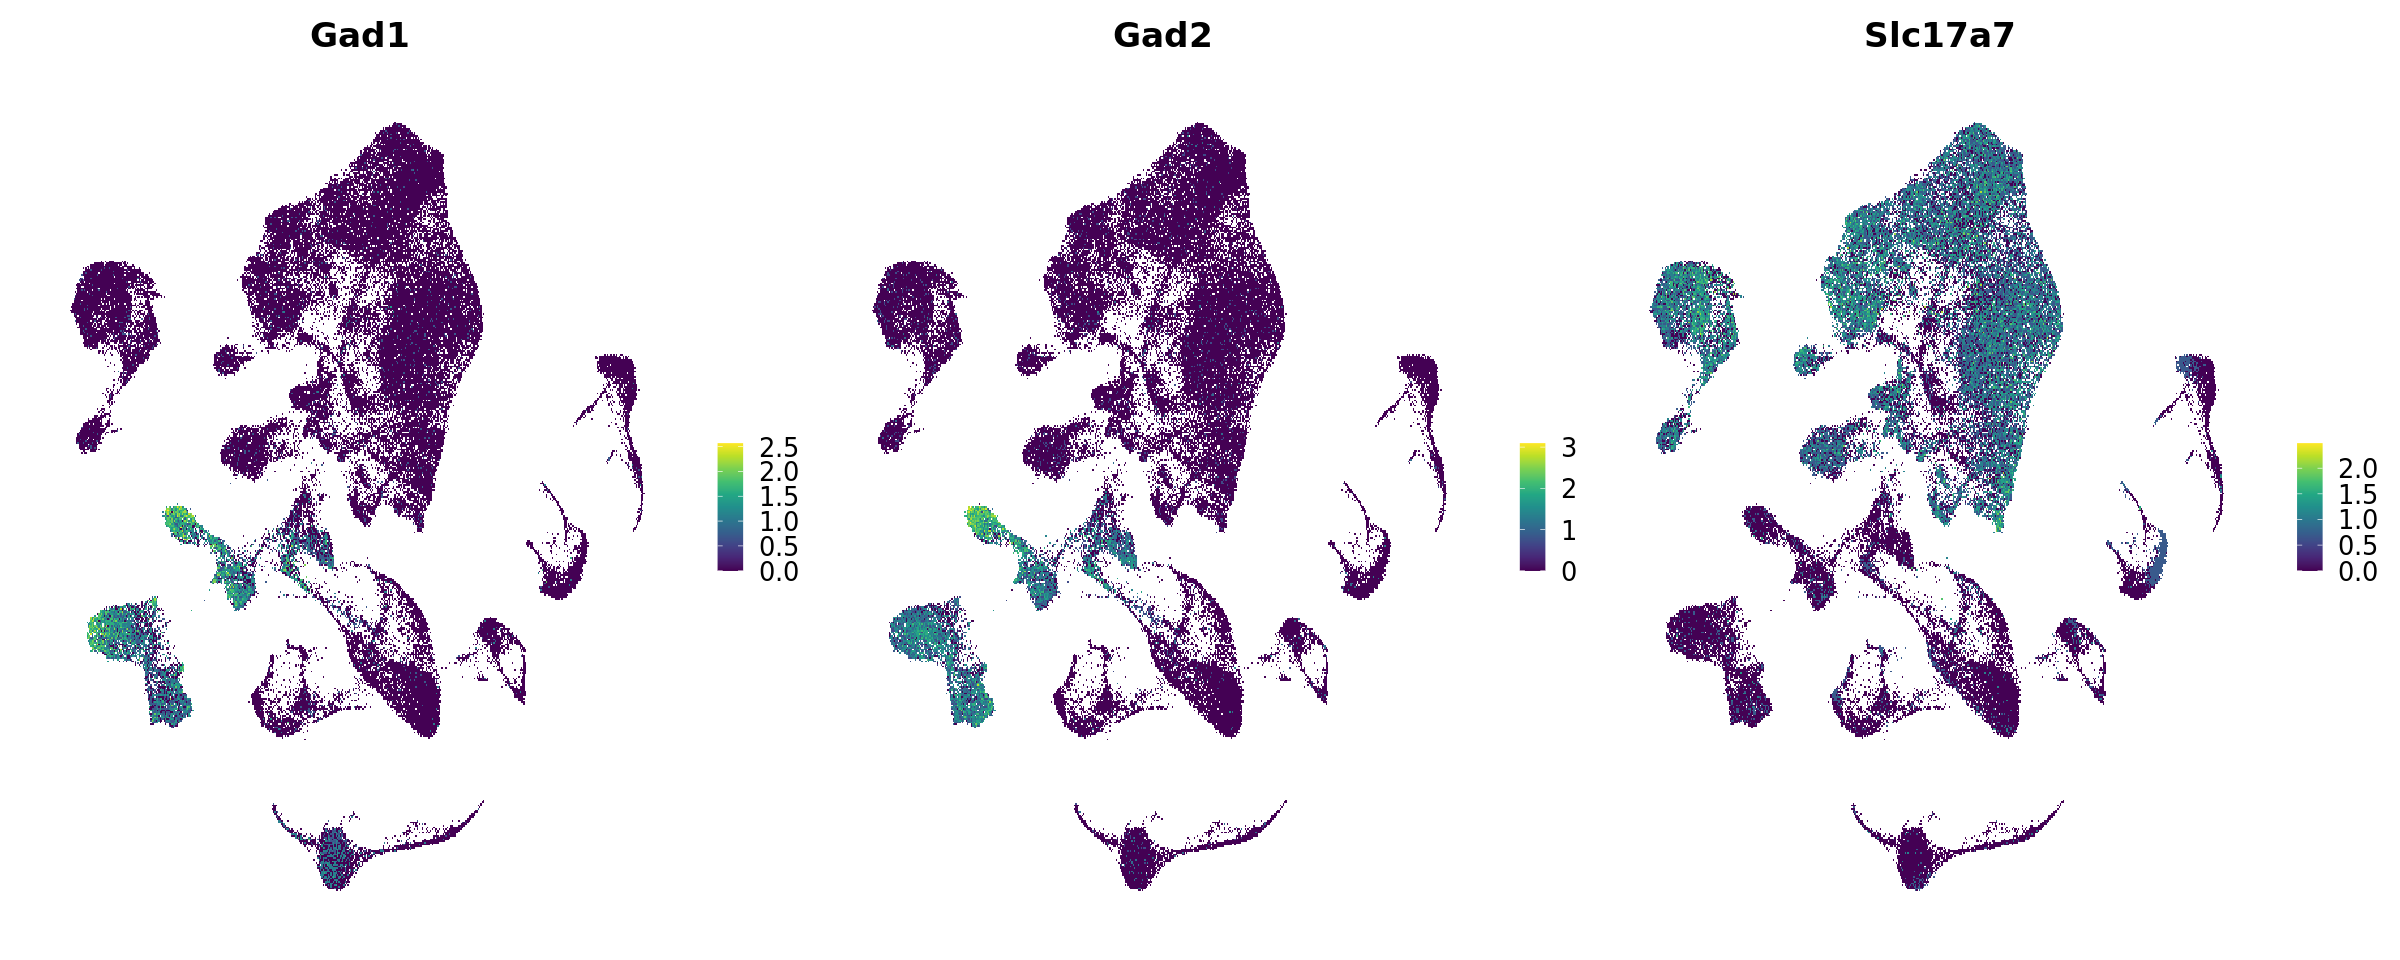

In [24]:
options(repr.plot.width = 20, repr.plot.height= 8)

DefaultAssay(obj) = "SCT"
featureplot(obj,c("Gad1","Gad2","Slc17a7"))

In [6]:
fivex_cast = readRDS("/share/crsp/lab/seyedam/share/topyfic/8mo/ENCODE_5xFAD_Cast/ENCODE_5x_seurat_final.rds")

fivex_cast_hc = subset(fivex_cast, subset = tissue == "Cortex")

In [7]:
obj = predict_celltypes(obj, fivex_cast_hc, "subtypes", "encode_5x_predictions")

Warning message:
"28187 features of the features specified were not present in both the reference query assays. 
Continuing with remaining 3000 features."


In [8]:
fivex_b6 = readRDS("/share/crsp/lab/seyedam/share/topyfic/8mo/ModelAD_5xFAD_Bl6/ModelAD_5x_seurat_final.rds")

fivex_b6_cx = subset(fivex_b6, subset = tissue == "Cortex")

obj = predict_celltypes(obj, fivex_b6_cx, "subtypes", "modelAD_predictions")

Warning message:
"27057 features of the features specified were not present in both the reference query assays. 
Continuing with remaining 2997 features."


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 118 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


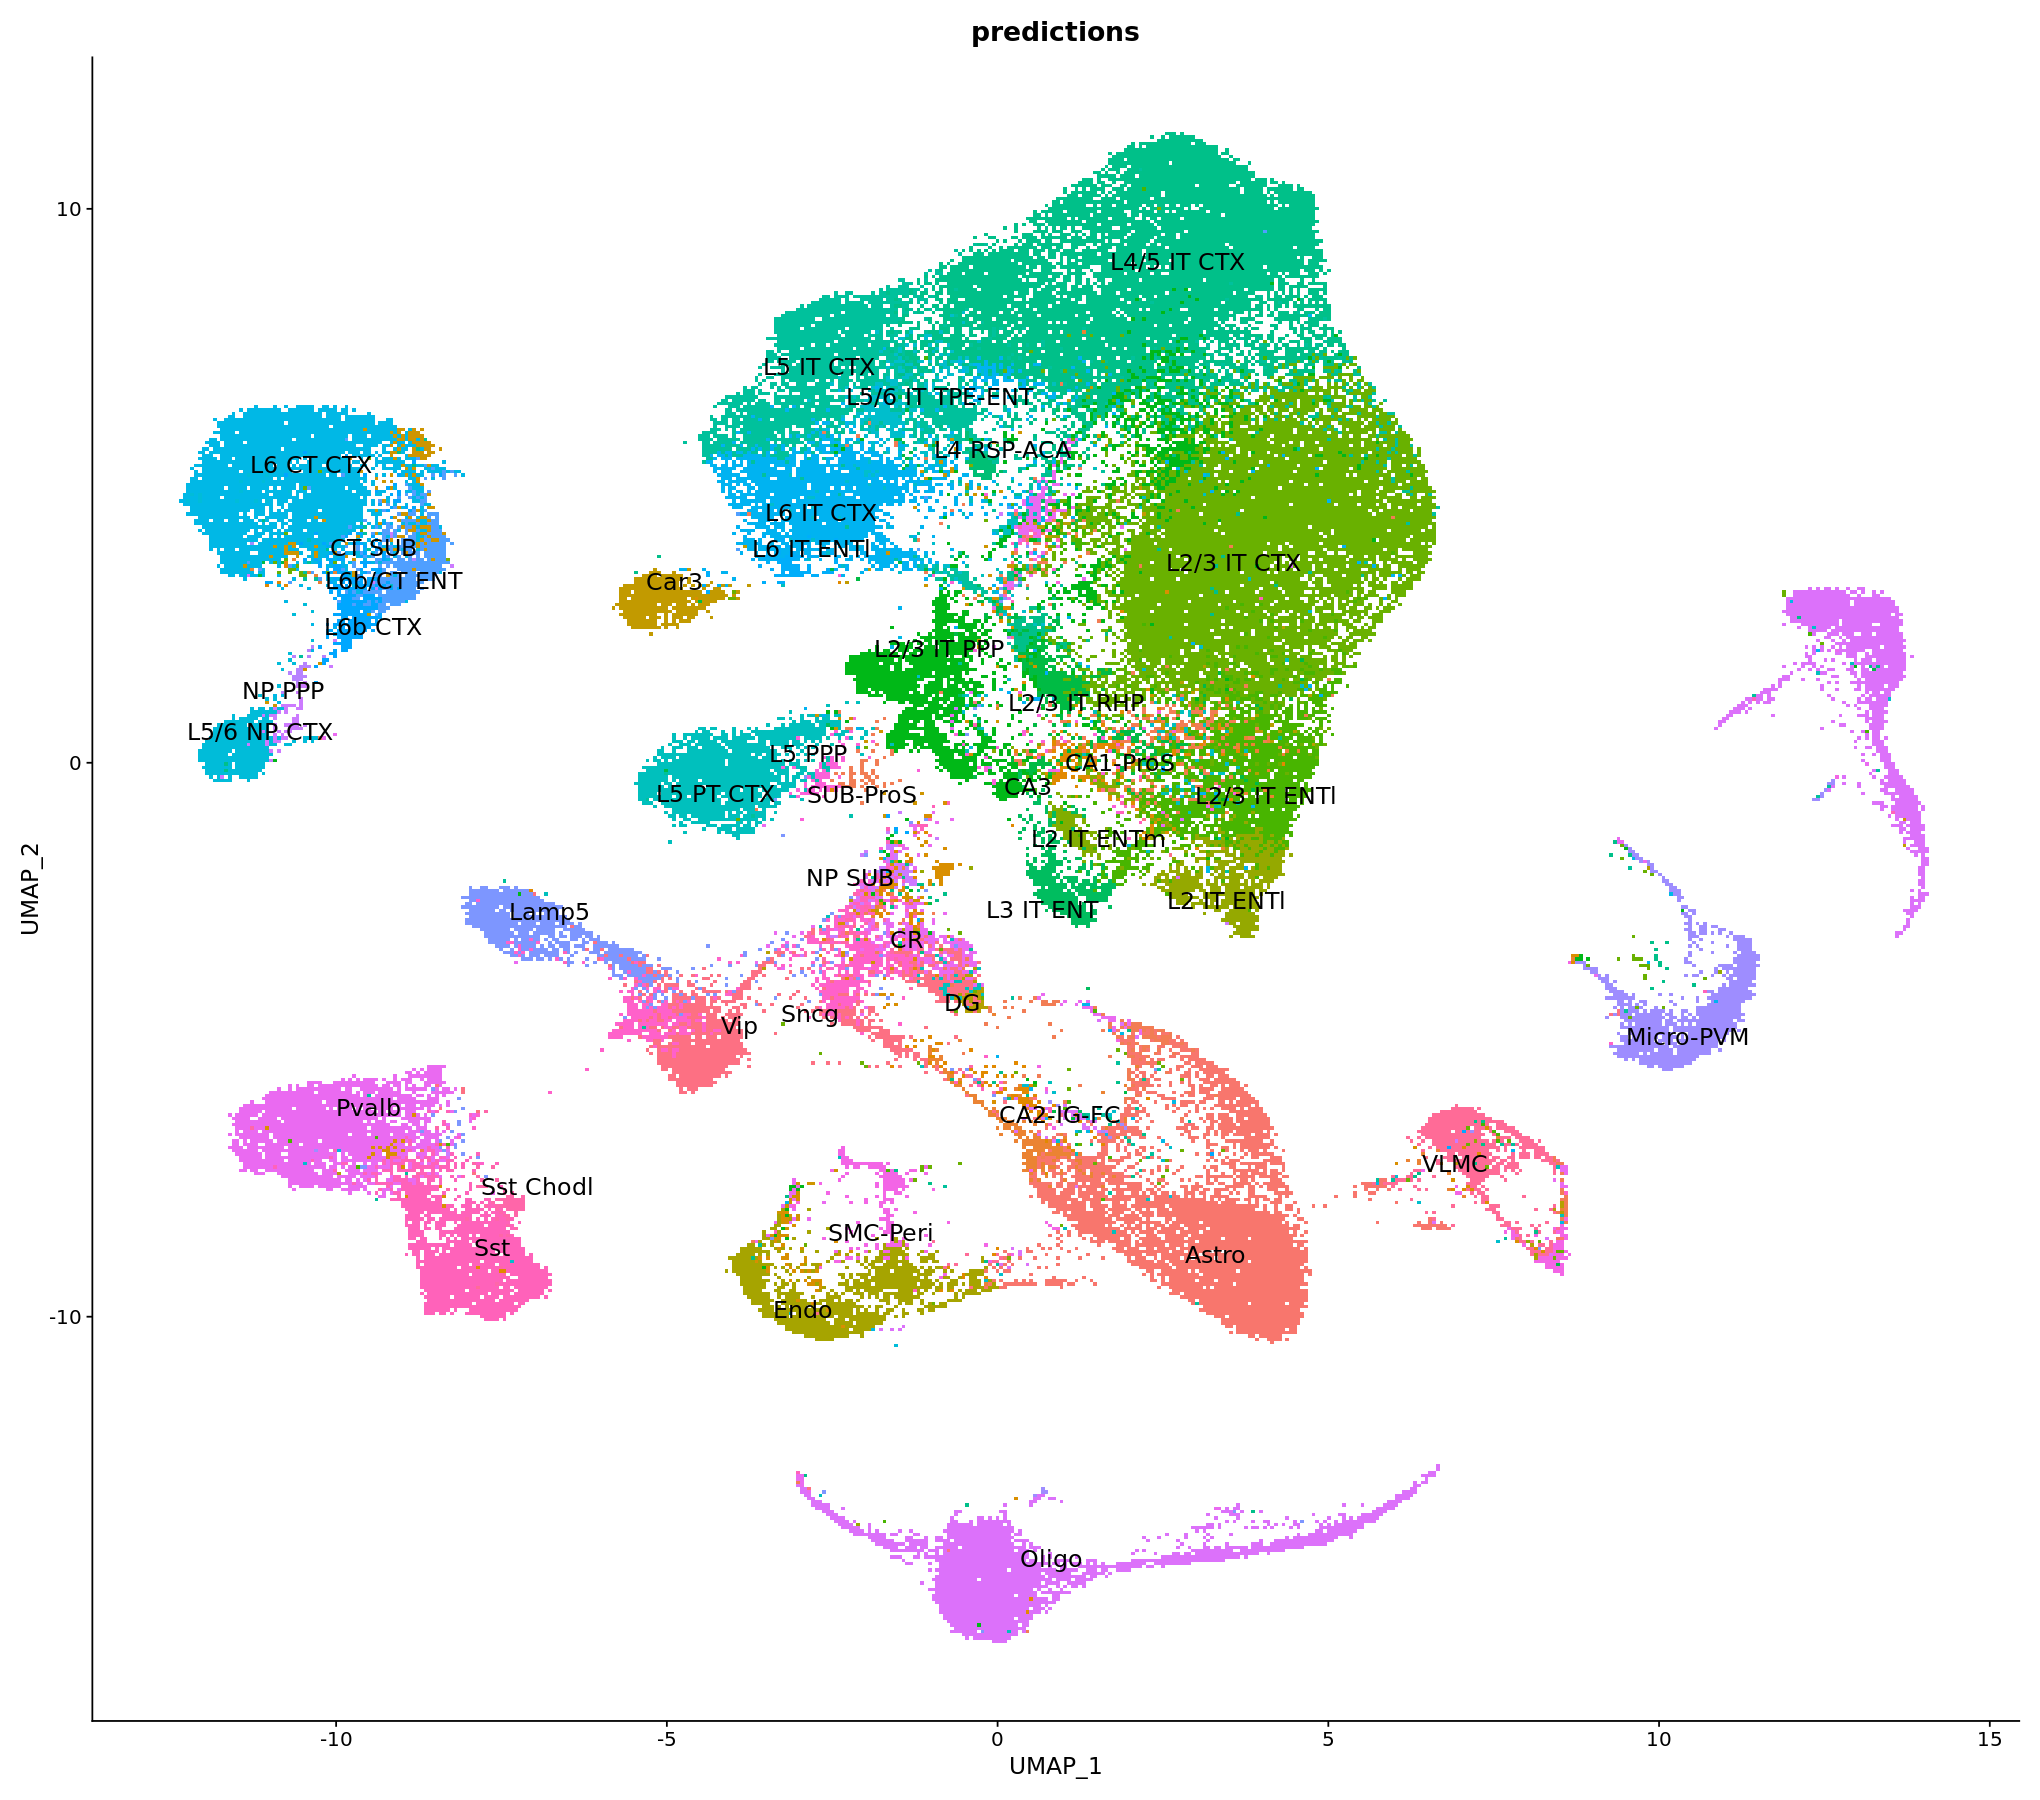

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 17 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


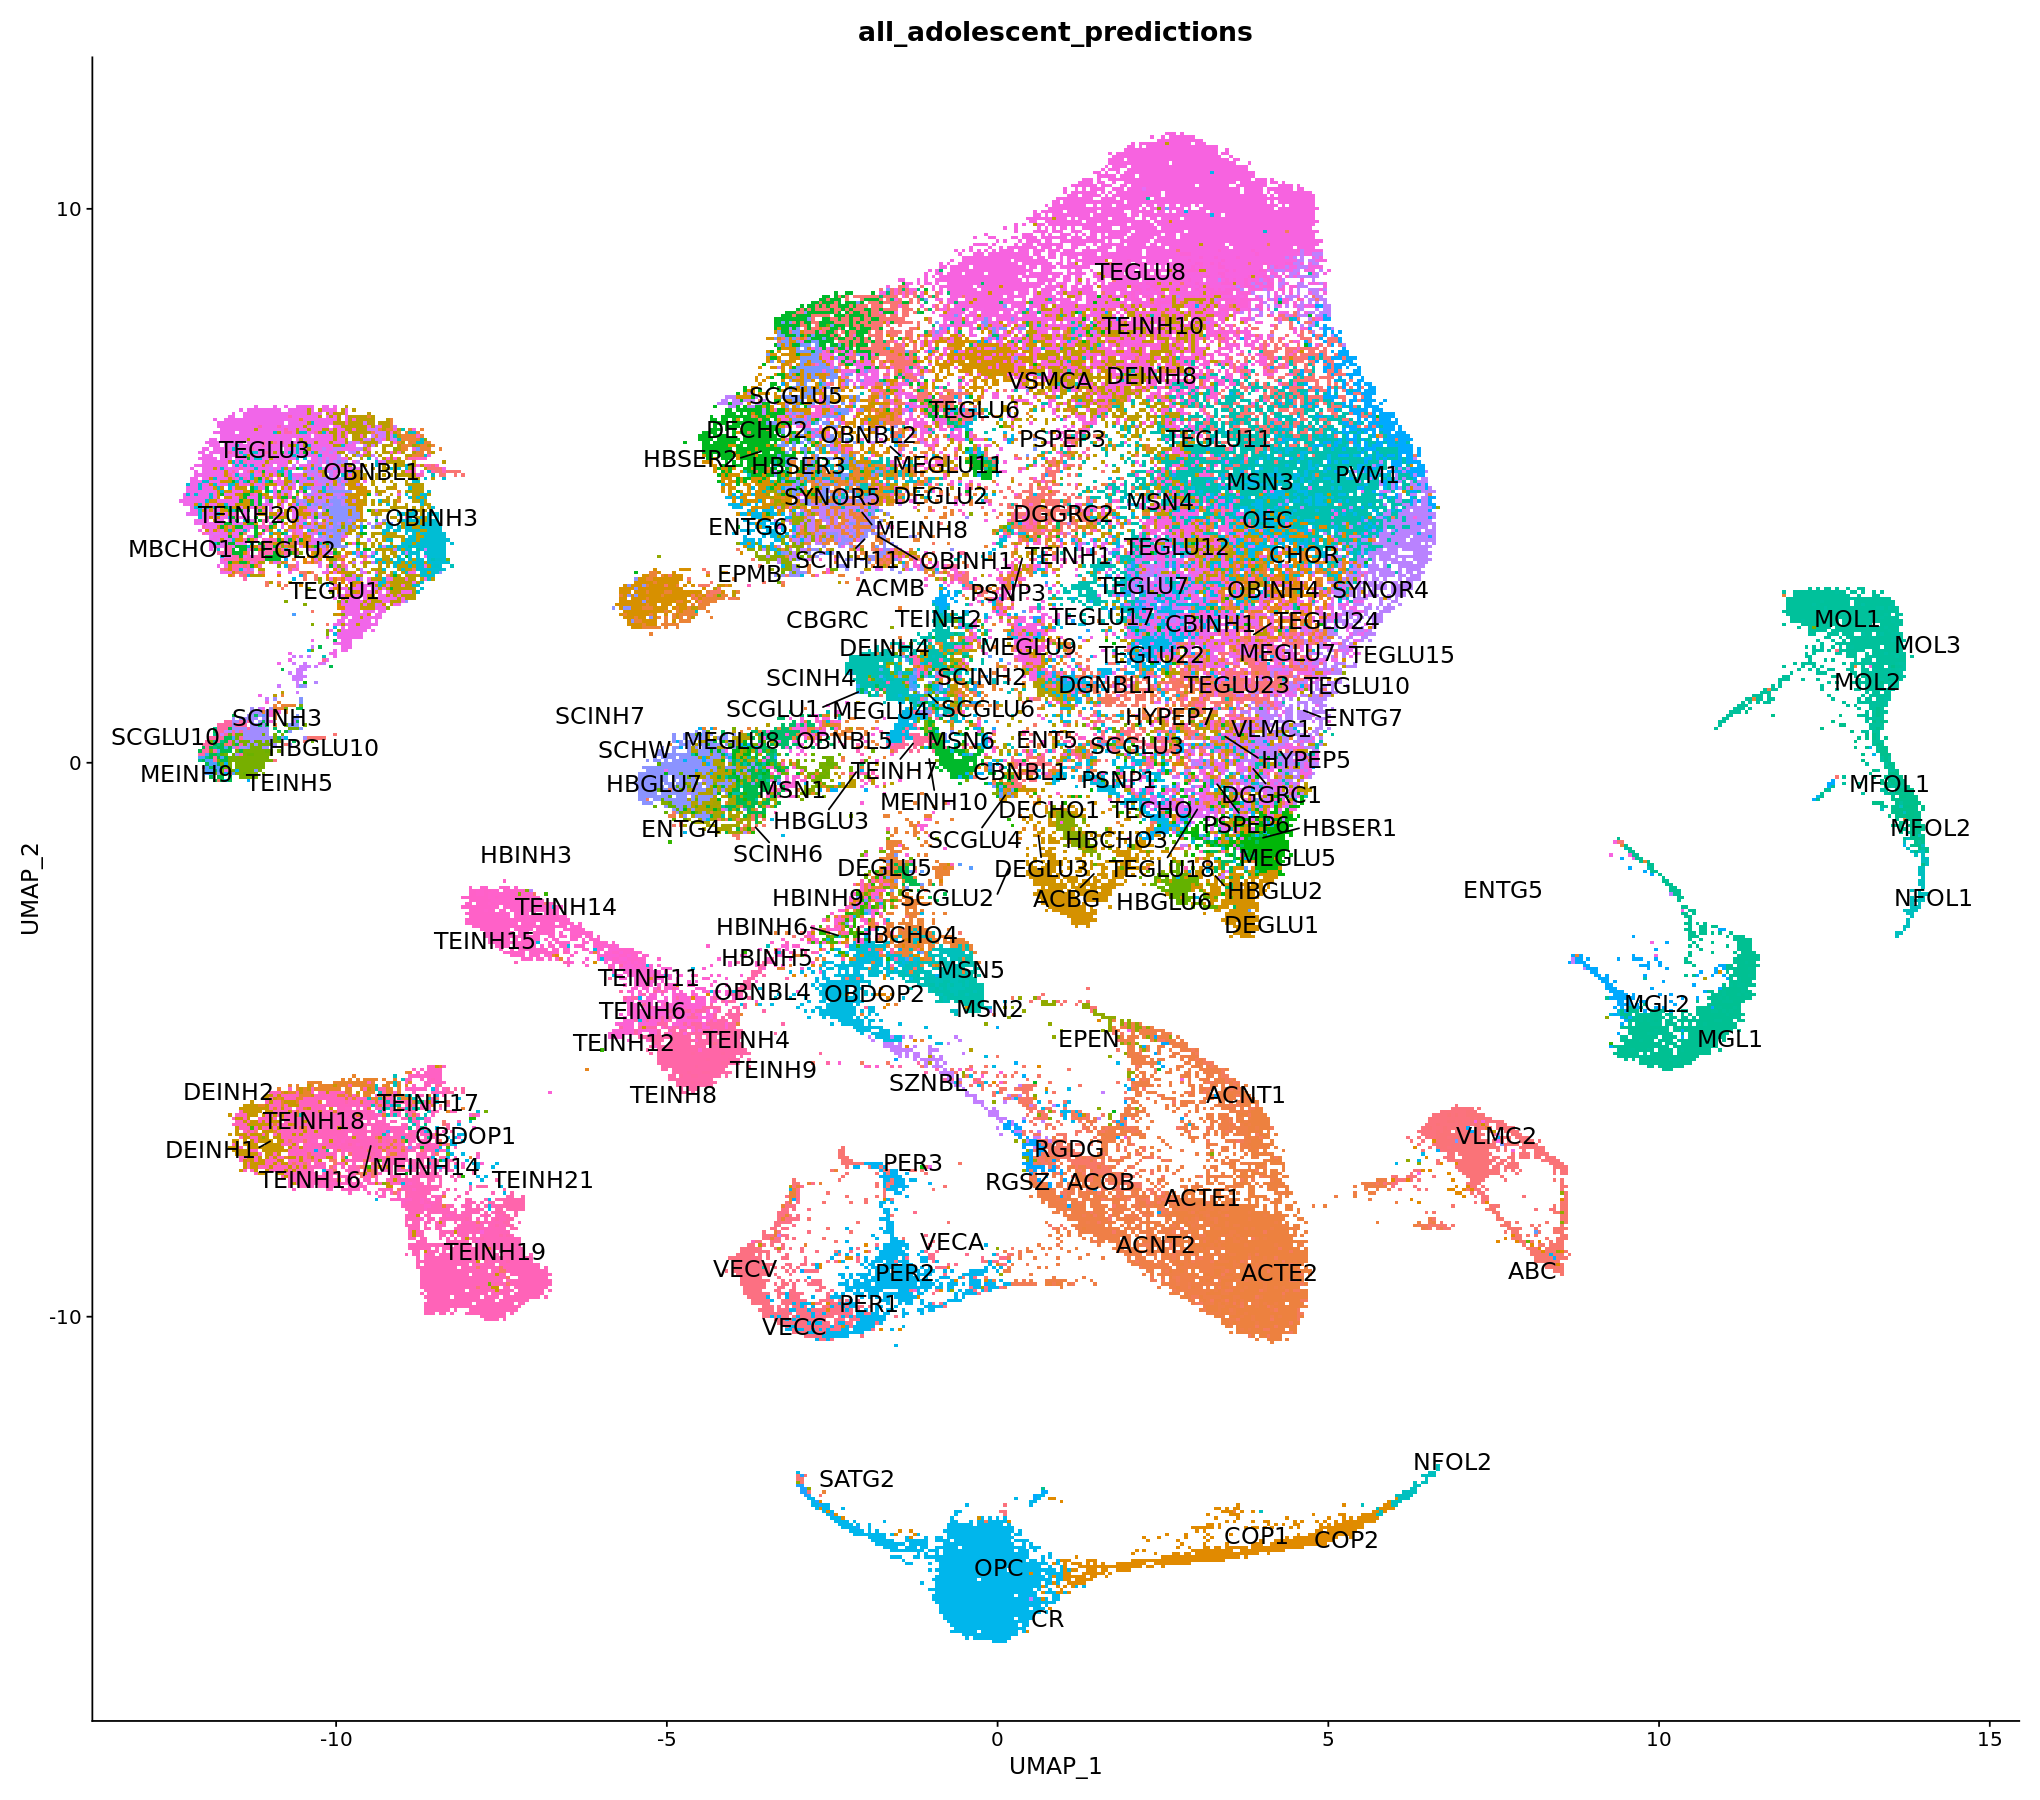

ERROR: Error: Cannot find 'hippocampus_predictions' in this Seurat object


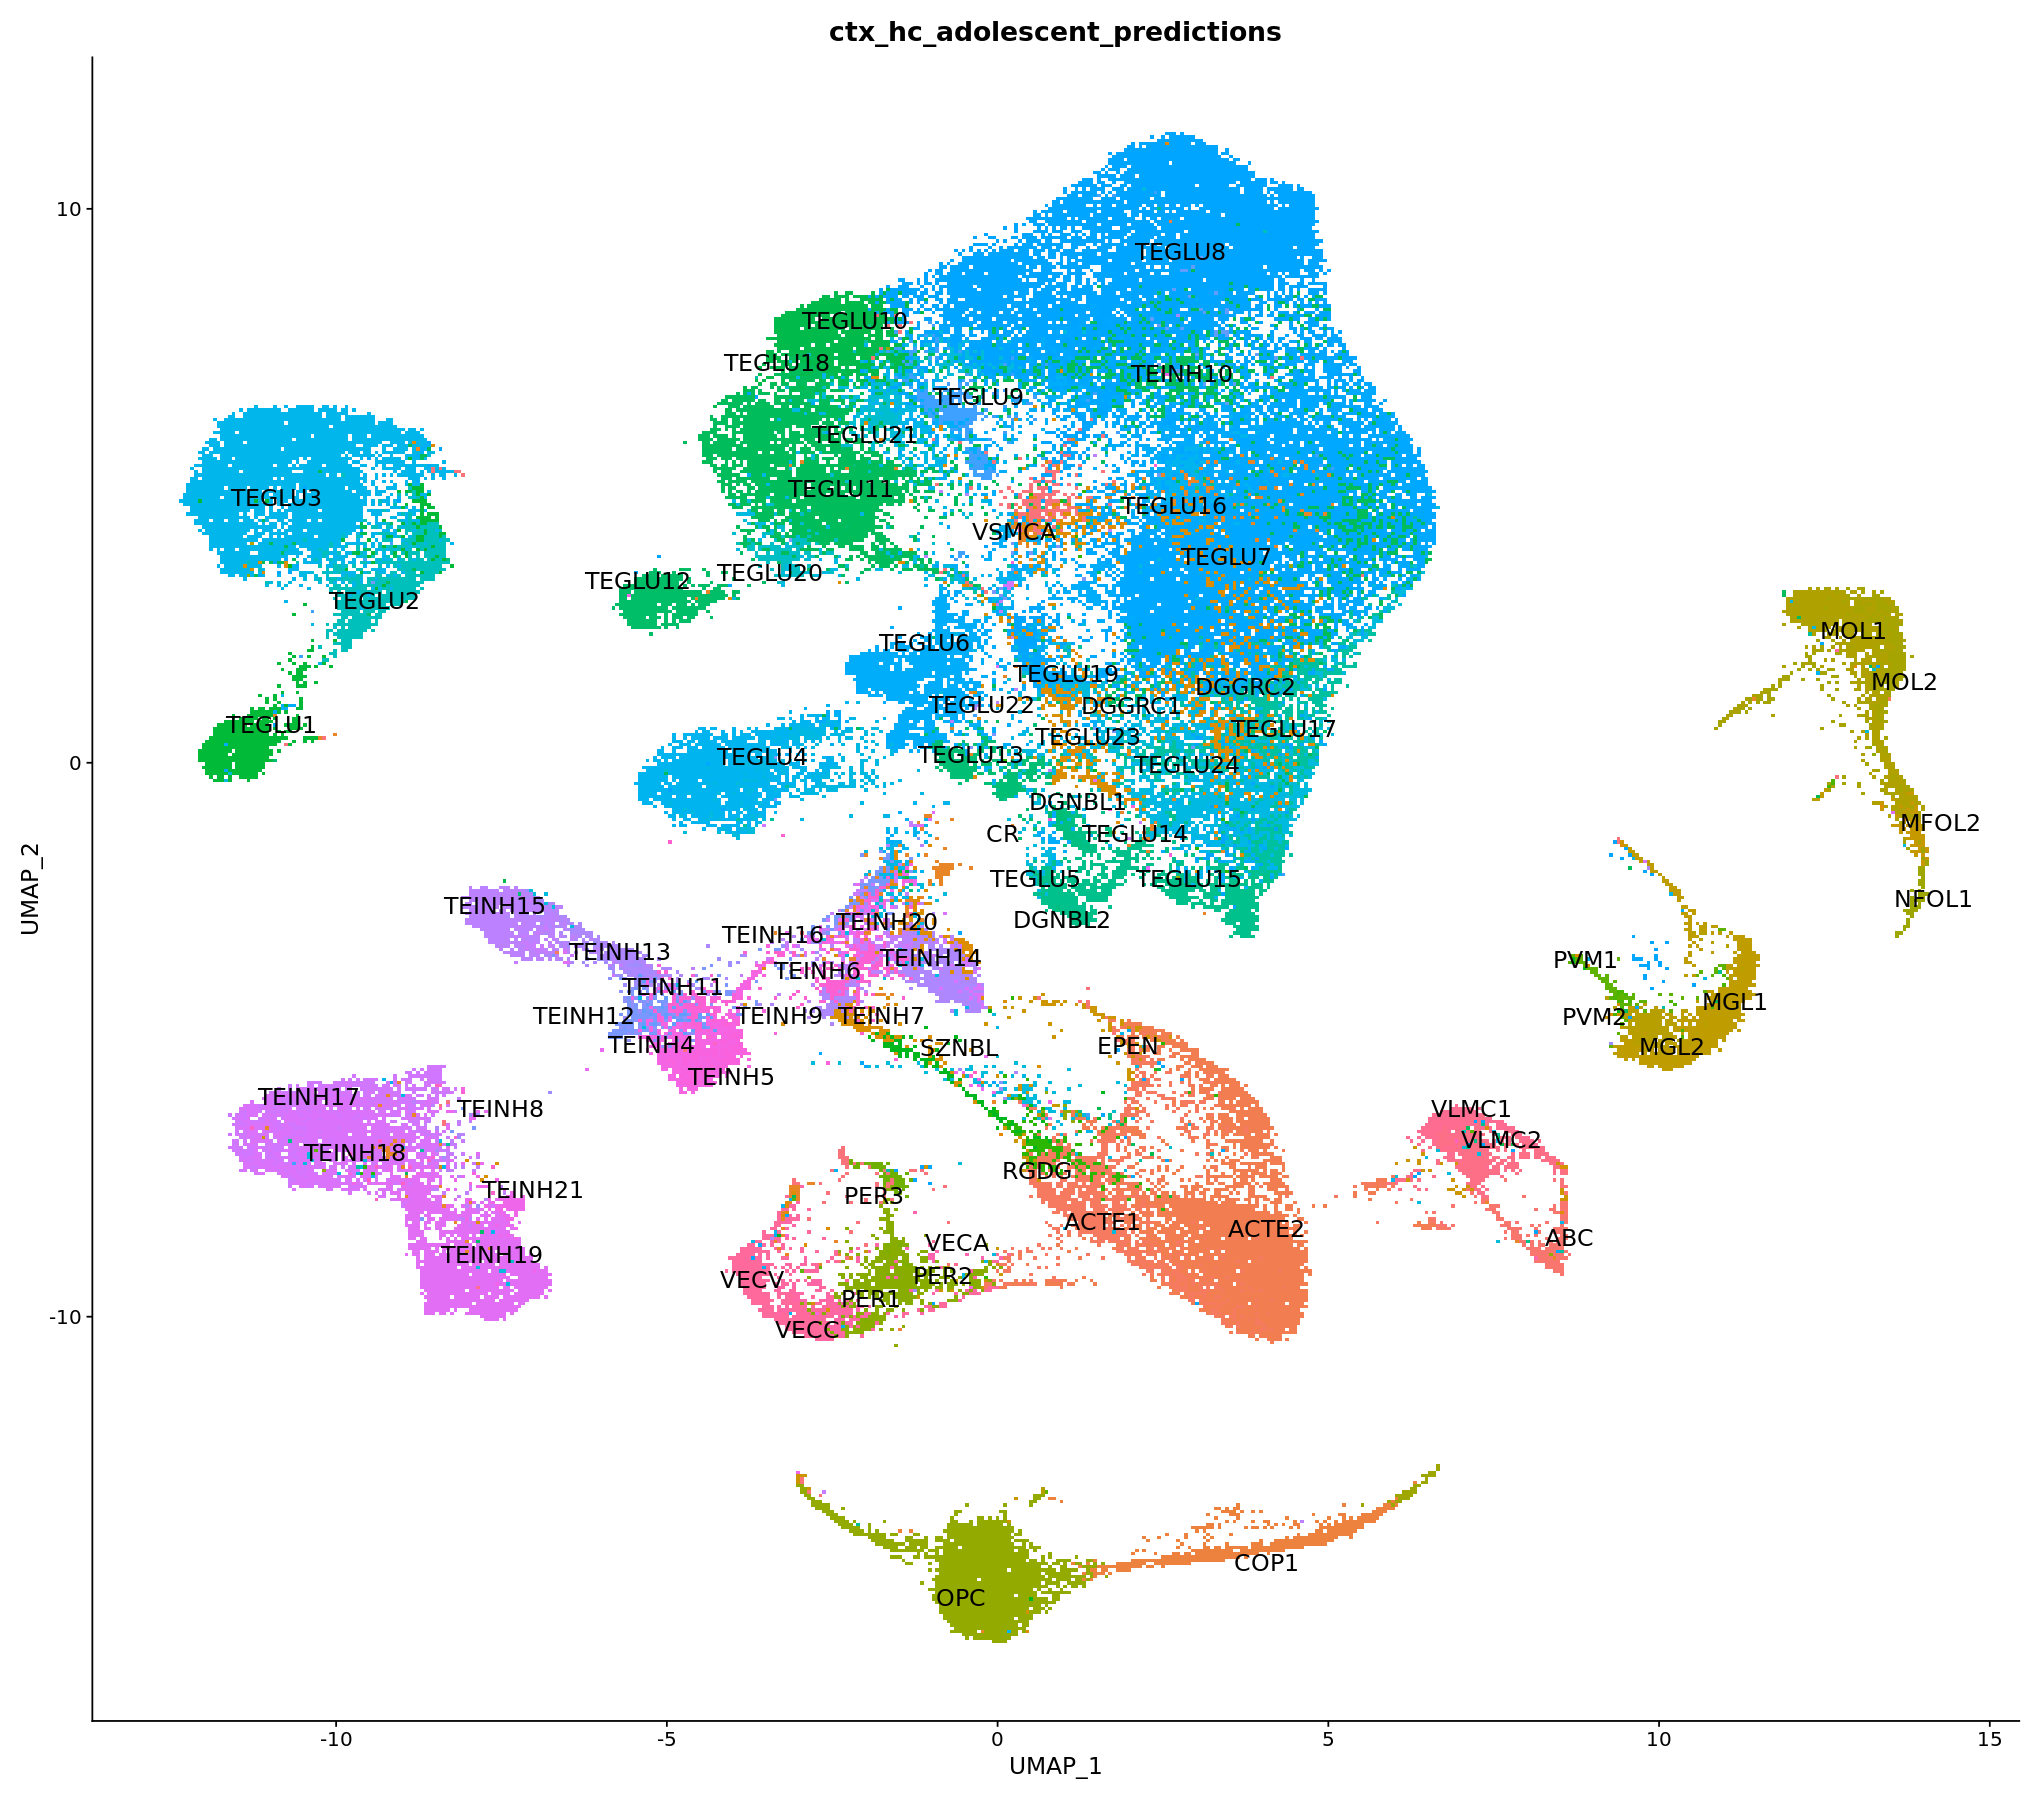

In [25]:
options(repr.plot.width = 17, repr.plot.height = 15)


DimPlot(obj, reduction = "umap", group.by = "predictions", label = TRUE, label.size = 5, repel = TRUE) & NoLegend()
DimPlot(obj, reduction = "umap", group.by = "all_adolescent_predictions",label = TRUE, label.size = 5, repel = TRUE) & NoLegend()
DimPlot(obj, reduction = "umap", group.by = "ctx_hc_adolescent_predictions",label = TRUE, label.size = 5, repel = TRUE) & NoLegend()
DimPlot(obj, reduction = "umap", group.by = "hippocampus_predictions",label = TRUE, label.size = 5, repel = TRUE) & NoLegend()



Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


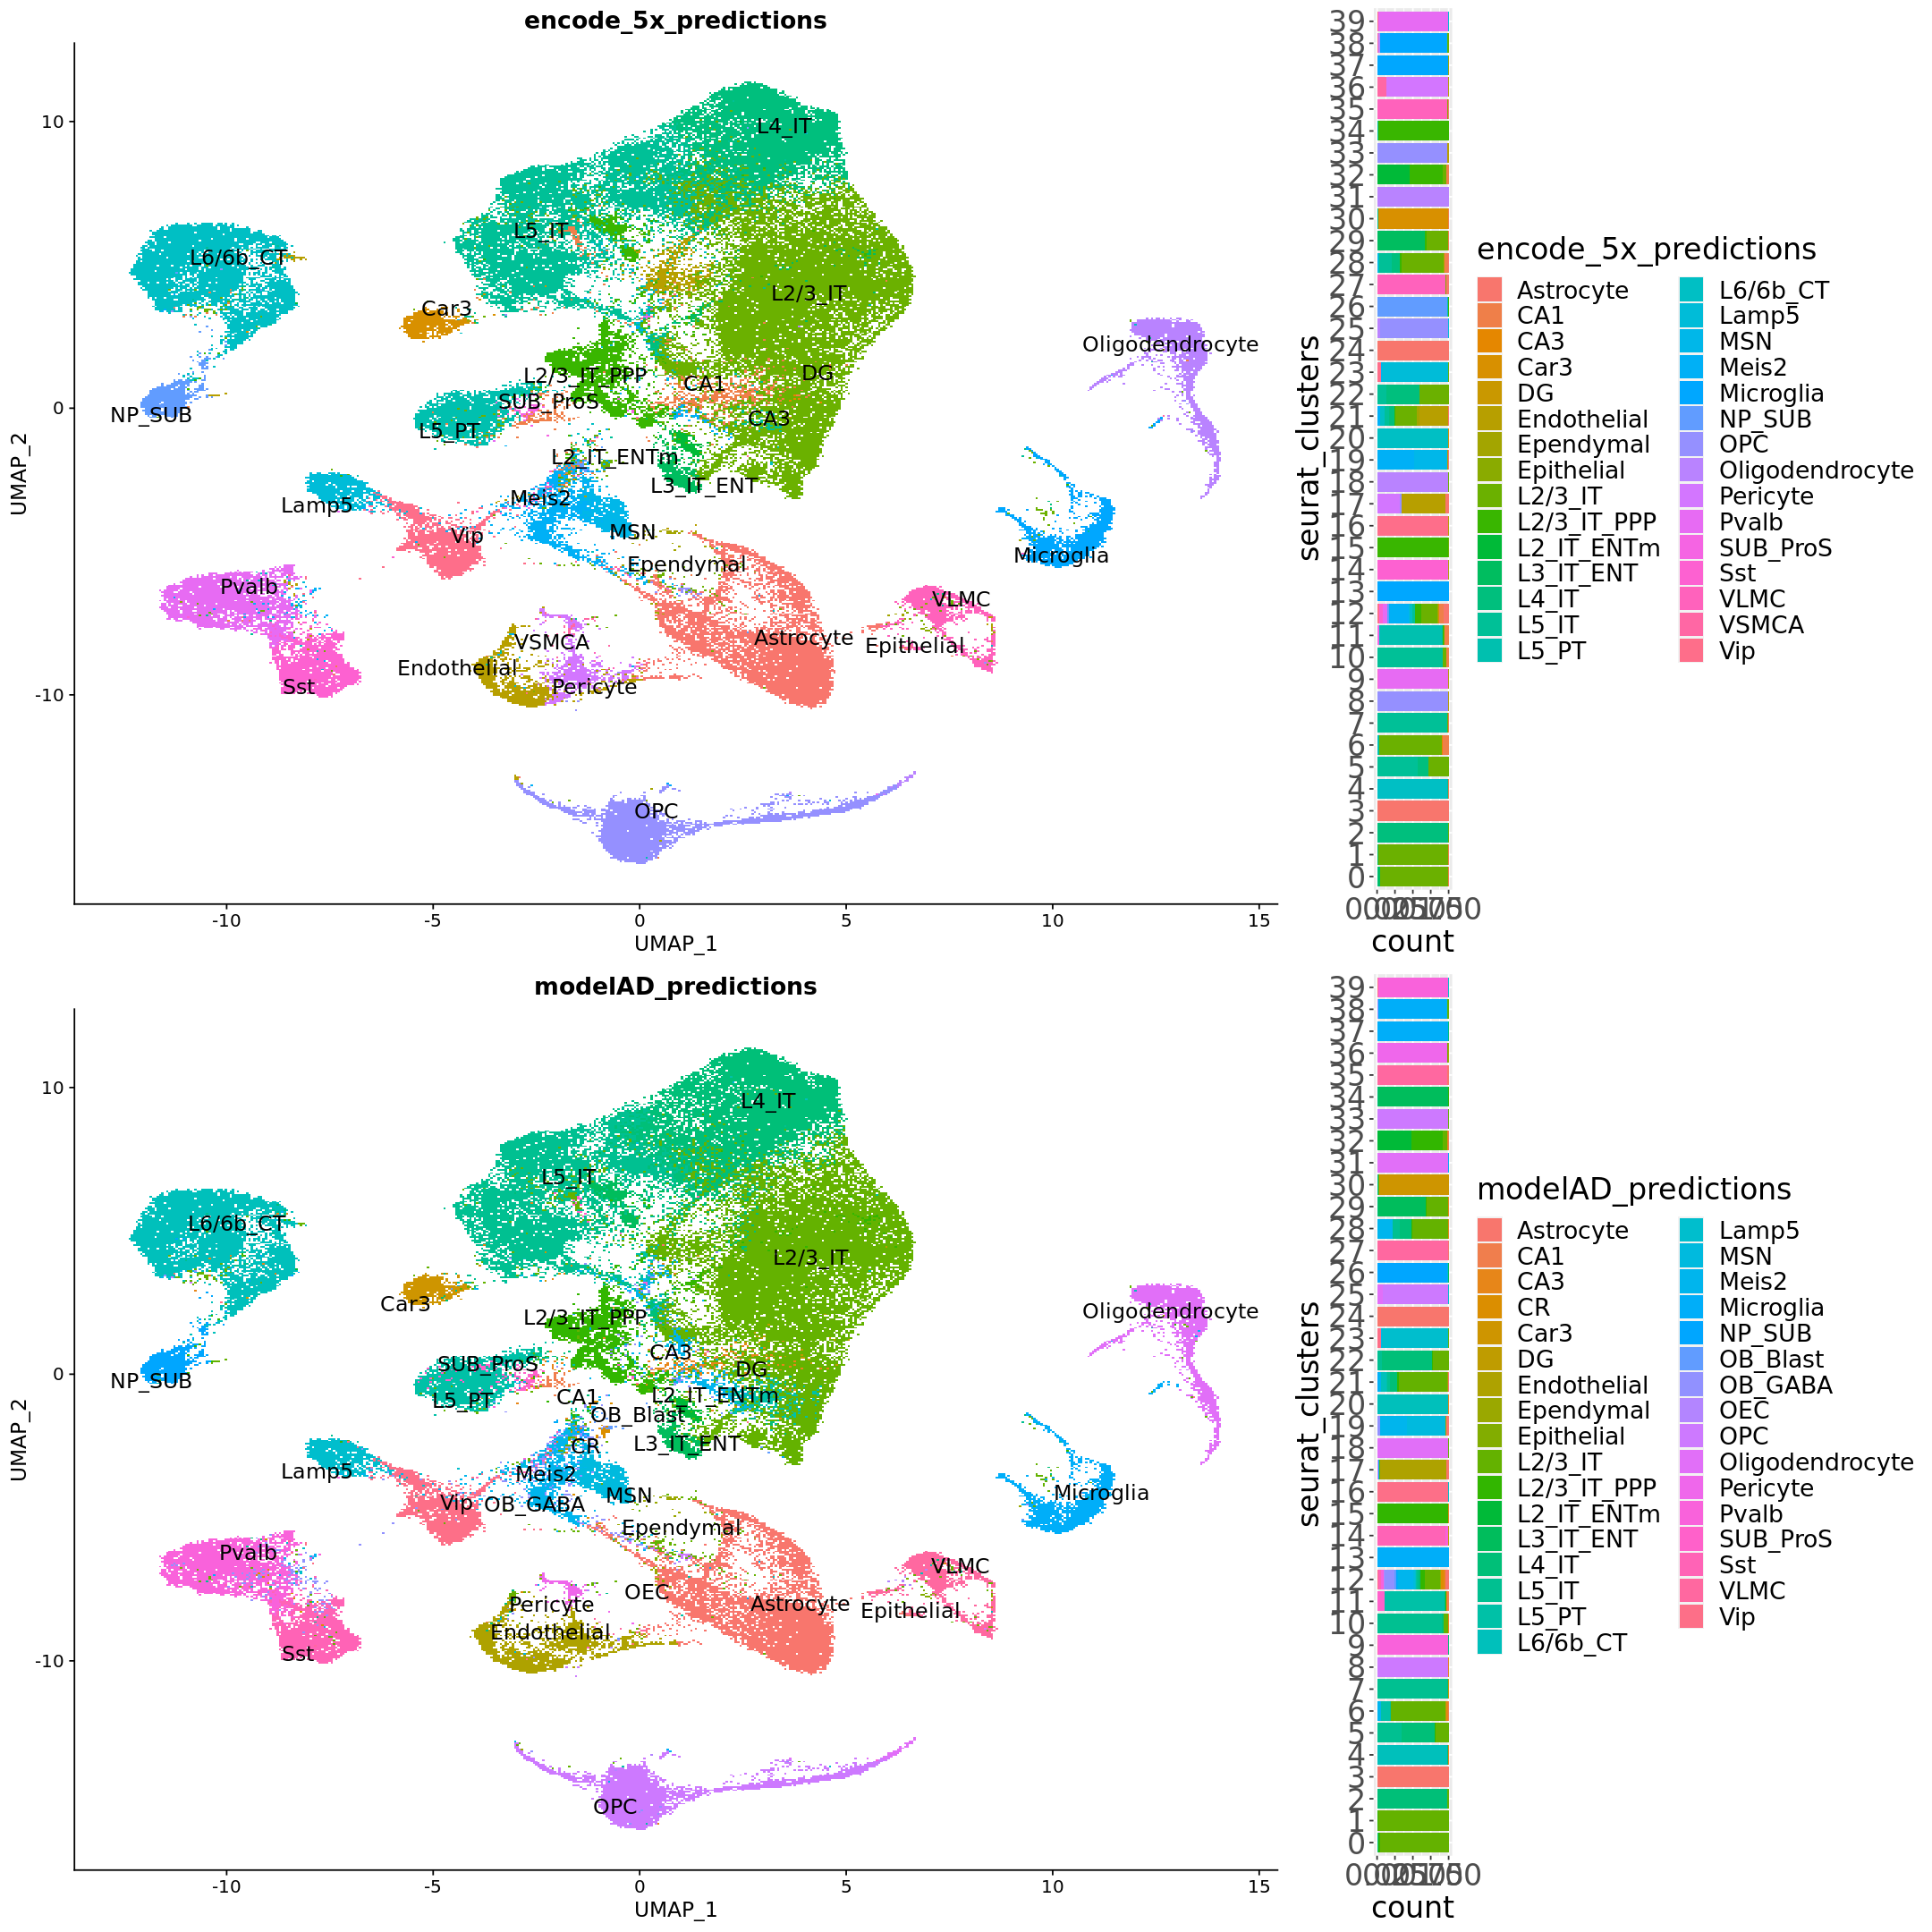

In [10]:
options(repr.plot.width = 18, repr.plot.height = 18)


p1=DimPlot(obj, reduction = "umap", group.by = "encode_5x_predictions", label = TRUE, label.size = 5, repel = TRUE) & NoLegend()
p2 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=encode_5x_predictions)) + geom_bar(position = "fill") & 
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()

p3=DimPlot(obj, reduction = "umap", group.by = "modelAD_predictions",label = TRUE, label.size = 5, repel = TRUE) & NoLegend()
p4 = ggplot(obj@meta.data, aes(x=seurat_clusters, fill=modelAD_predictions)) + geom_bar(position = "fill") & 
theme(text = element_text(size = 20), axis.text.x = element_text(size = 20), axis.text.y = element_text(size = 20)) & coord_flip()
gridExtra::grid.arrange(
  p1, p2, p3, p4,
  widths = c(2,1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 4)))



# order

In [138]:
Idents(obj) = obj$seurat_clusters
order = c(3,24, # astrocyte
          17, # endothelial
          12, # gaba_early
          19, # meis2_GABA
          23, # lamp5_GABA
          16, # Vip_GABA
          14, # Sst_GABA
          39,9, # Pvalb_GABA
          30, # Car3_glut
          6,1,0,21, # l2/3_IT
          15, # l2/3_IT_PPP
          32,29, # L3-IT-ent
          2,22,5, # l4_it
          34,10, # l5 it
          11, # L5_PT
          7, # l6 it
          4,20, # l6/6b
          26, # np_sub
          28, # PND04 glut neuron
          13,37,38, # microglia
          18, # mol
          31, # mfol
          25, # cop
          8,33, # opc
          36, # pericyte
          27,35 # vlmc          
         )

Idents(obj) = factor(Idents(obj), levels = order)



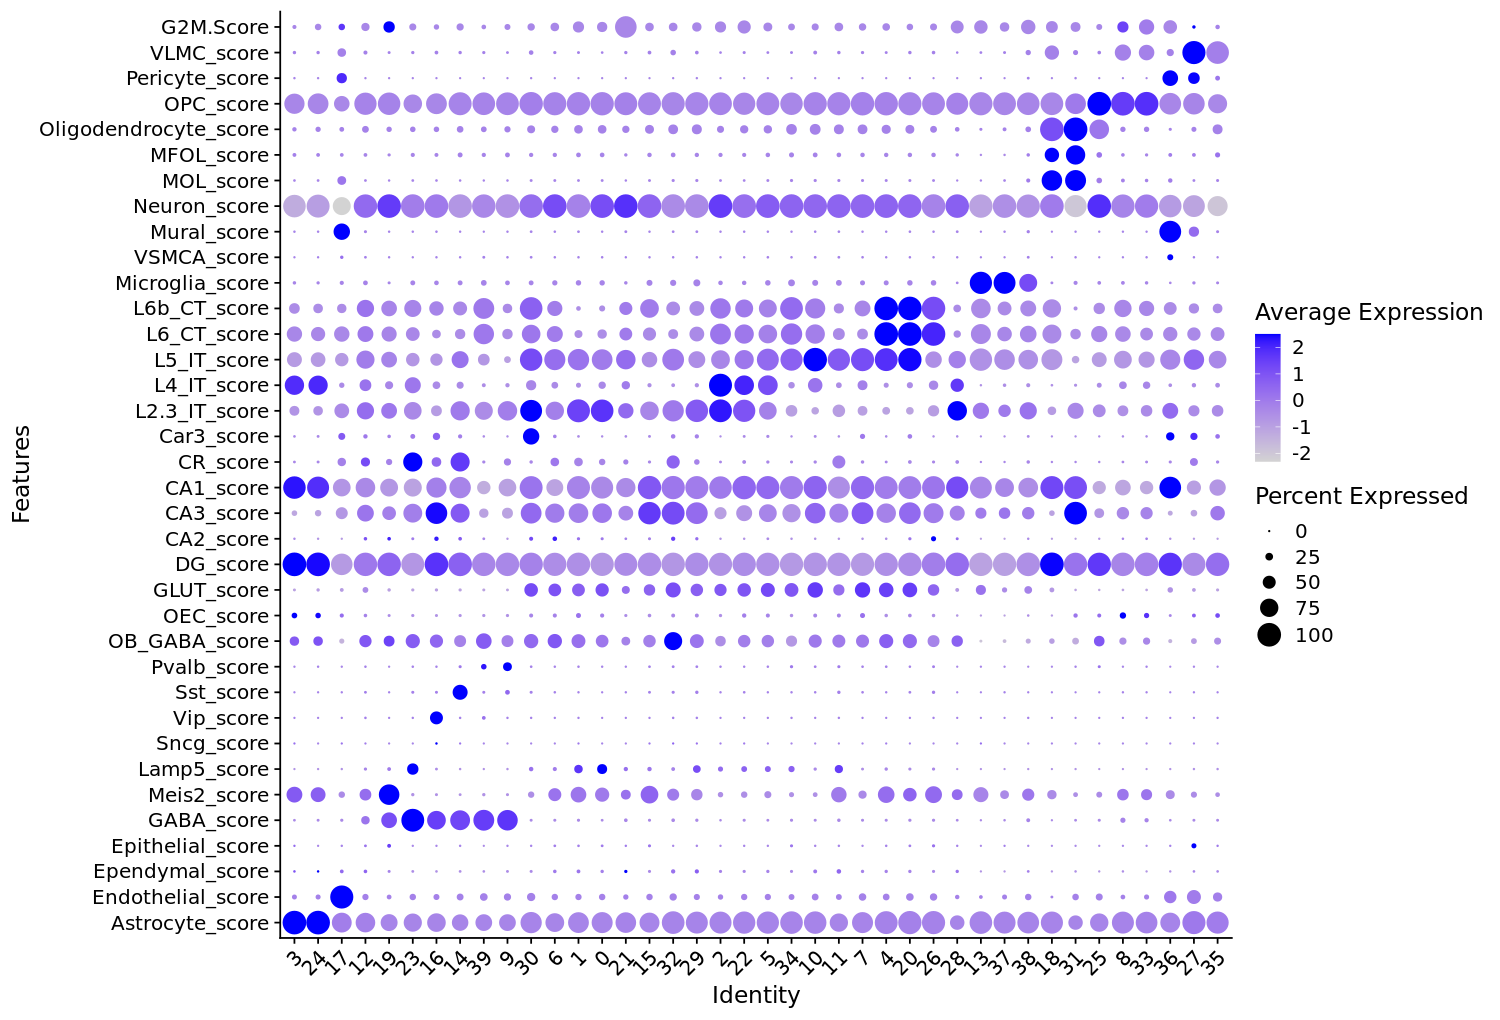

In [139]:
options(repr.plot.width = 12.5, repr.plot.height= 8.5)

DotPlot(obj, features =  c(paste0(unique(markers$Subtype),"_score"),"G2M.Score"))+ 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) & coord_flip() 


In [140]:
celltypes = c(rep("Astrocyte",2),# 3,24,
              "Endothelial", # 17
              "GABA_early",# 12
              "Meis2",# 19, 
              "Lamp5", #23
              "Vip", # 16
              "Sst", # 14
              rep("Pvalb",2), # 9,39
              "Car3", # 30
              rep("L2/3_IT",4), # 1, 0, 6,21
              "L2/3_IT_PPP", # 15
              rep("L3_IT_ENT",2), # 32,29
              rep("L4_IT",3), #2,22,5,
              rep("L5_IT",2), # 10, 34
              "L5_PT", # 11
              "L6_IT", # 7
              rep("L6/6b_CT",2), # 4,20
              "NP_SUB", # 26
              "Glut_early", # 28
              rep("Microglia",3), #13,37,38,
              "MOL", #18
              "MFOL", # 31
              "COP", # 25
              rep("OPC",2), #8,33,
              "Pericyte", # 36
              rep("VLMC",2) #27,35
             )

names(celltypes) = levels(Idents(obj))
obj = RenameIdents(obj, celltypes)

order = c("Astrocyte","Endothelial",
          "GABA_early","Meis2","Lamp5","Vip","Sst","Pvalb",
          "Glut_early","Car3","L2/3_IT","L2/3_IT_PPP","L3_IT_ENT","L4_IT","L5_IT","L5_PT","L6_IT","L6/6b_CT","NP_SUB",
          "Microglia",
          "MOL","MFOL","COP","OPC",
          "Pericyte","VLMC")
Idents(obj) = factor(Idents(obj), levels = order)
obj$celltypes = Idents(obj)

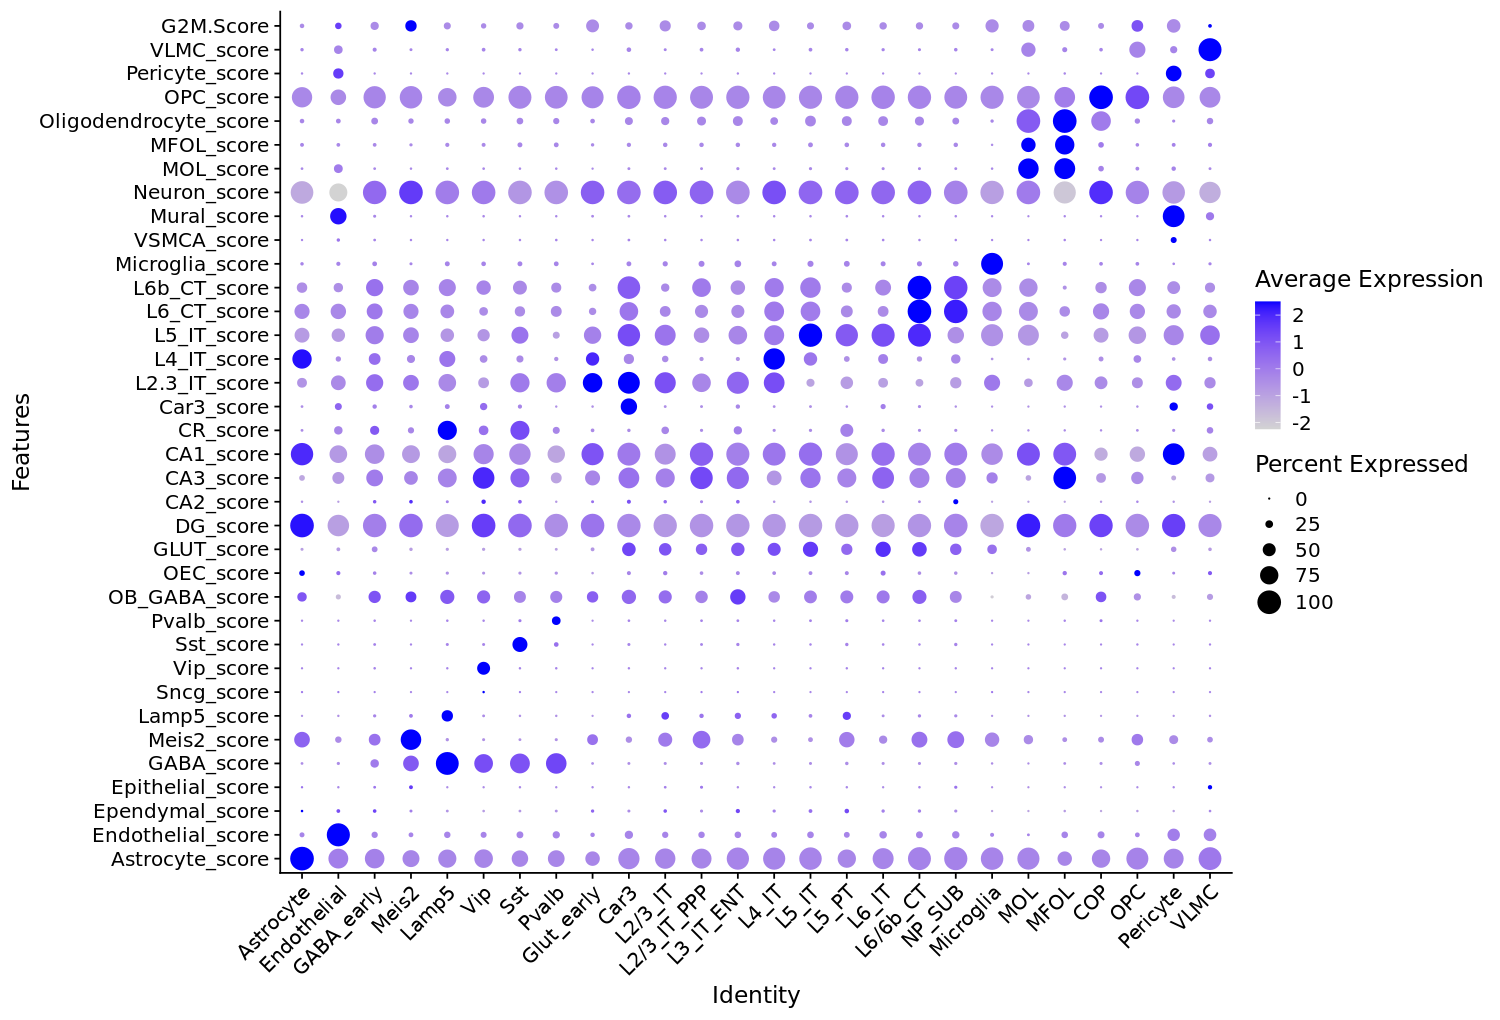

In [141]:
options(repr.plot.width = 12.5, repr.plot.height= 8.5)

DotPlot(obj, features =  c(paste0(unique(markers$Subtype),"_score"),"G2M.Score"))+ 
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) & coord_flip() 


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



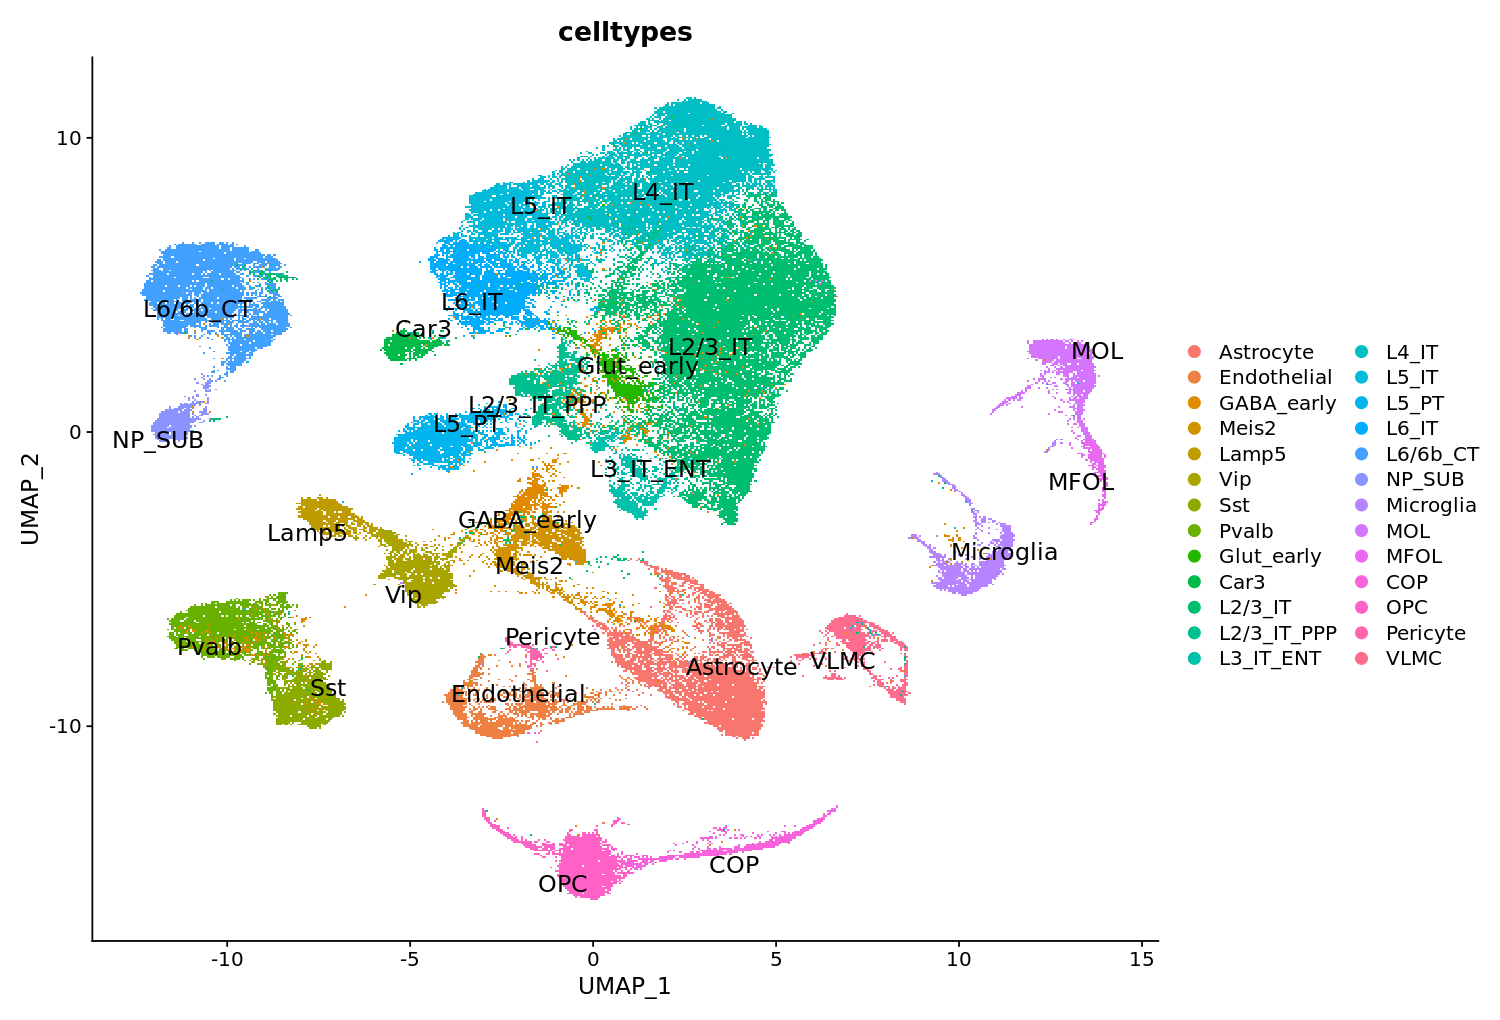

In [142]:
DimPlot(obj, reduction = "umap", group.by = "celltypes",label = TRUE, label.size = 5, repel = TRUE) 


# Celltypes, gen celltype

In [143]:
table(obj$celltypes)


  Astrocyte Endothelial  GABA_early       Meis2       Lamp5         Vip 
       8560        2746        2932        2257        1624        2754 
        Sst       Pvalb  Glut_early        Car3     L2/3_IT L2/3_IT_PPP 
       2843        4376        1336        1023       24398        2782 
  L3_IT_ENT       L4_IT       L5_IT       L5_PT       L6_IT    L6/6b_CT 
       1819       15595        4073        3147        4615        8661 
     NP_SUB   Microglia         MOL        MFOL         COP         OPC 
       1386        3426        2581         760        1406        4765 
   Pericyte        VLMC 
        335        1918 

In [144]:
obj$subtypes = obj$celltypes


In [145]:
obj$celltypes = gsub("MOL","Oligodendrocyte",obj$celltypes)
obj$celltypes = gsub("MFOL","Oligodendrocyte",obj$celltypes)
obj$celltypes = gsub("COP","Oligodendrocyte",obj$celltypes)

obj$celltypes = gsub("Glut_early","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("Car3","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L2/3_IT_PPP","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L2/3_IT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L3_IT_ENT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L4_IT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L5_IT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L5_PT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L6_IT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("L6/6b_CT","Glutamatergic",obj$celltypes)
obj$celltypes = gsub("NP_SUB","Glutamatergic",obj$celltypes)

obj$celltypes = gsub("GABA_early","GABAergic",obj$celltypes)
obj$celltypes = gsub("Meis2","GABAergic",obj$celltypes)
obj$celltypes = gsub("Lamp5","GABAergic",obj$celltypes)
obj$celltypes = gsub("Vip","GABAergic",obj$celltypes)
obj$celltypes = gsub("Sst","GABAergic",obj$celltypes)
obj$celltypes = gsub("Pvalb","GABAergic",obj$celltypes)


In [146]:
table(obj$celltypes)


      Astrocyte     Endothelial       GABAergic   Glutamatergic       Microglia 
           8560            2746           16786           68835            3426 
            OPC Oligodendrocyte        Pericyte            VLMC 
           4765            4747             335            1918 

In [148]:
obj$gen_celltype = obj$celltypes


In [149]:
obj$gen_celltype = gsub("GABAergic","Neuron",obj$gen_celltype)
obj$gen_celltype = gsub("Glutamatergic","Neuron",obj$gen_celltype)

obj$gen_celltype = gsub("Microglia","Immune",obj$gen_celltype)

obj$gen_celltype = gsub("Oligodendrocyte","Glial",obj$gen_celltype)
obj$gen_celltype = gsub("OPC","Glial",obj$gen_celltype)
obj$gen_celltype = gsub("Astrocyte","Glial",obj$gen_celltype)


In [150]:
table(obj$gen_celltype)


Endothelial       Glial      Immune      Neuron    Pericyte        VLMC 
       2746       18072        3426       85621         335        1918 

In [151]:
saveRDS(obj,file=paste0("../seurat/",tissue,"_Parse_10x_integrated.rds"))


In [152]:
write.csv(obj@meta.data,file=paste0("../seurat/",str_to_lower(tissue),"_Parse_10x_integrated_metadata.csv"))



In [153]:
obj_parse = subset(obj, subset = technology == "Parse")
saveRDS(obj_parse, file = paste0("../seurat/",tissue,"_Parse.rds"))

obj_10x = subset(obj, subset = technology == "10x")
saveRDS(obj_10x, file = paste0("../seurat/",tissue,"_10x.rds"))


# Subset for regulatory genes

In [164]:
reg_genes = read.csv("../ref/gene_display_table_expressed_7categories.csv")


In [165]:
table(reg_genes$gene_name %in% rownames(obj@assays$RNA@counts))




TRUE 
2701 

In [166]:
mtx_parse = obj_parse@assays$RNA@counts
mtx_parse = mtx_parse[rownames(mtx_parse) %in% reg_genes$gene_name, ]
mtx_parse = mtx_parse[match(reg_genes$gene_name, rownames(mtx_parse)), ]

mtx_10x = obj_10x@assays$RNA@counts
mtx_10x = mtx_10x[rownames(mtx_10x) %in% reg_genes$gene_name, ]
mtx_10x = mtx_10x[match(reg_genes$gene_name, rownames(mtx_10x)), ]

In [167]:
table(rownames(mtx_parse) == reg_genes$gene_name)
table(rownames(mtx_10x) == reg_genes$gene_name)


TRUE 
2701 


TRUE 
2701 

In [168]:
writeMM(mtx_parse, file=paste0("../seurat/",tissue,"_Parse.mtx"))

writeMM(mtx_10x, file=paste0("../seurat/",tissue,"_10x.mtx"))



NULL

NULL

In [169]:
write.csv(obj_parse@meta.data, file=paste0("../seurat/",tissue,"_Parse_metadata.csv"))

write.csv(obj_10x@meta.data, file=paste0("../seurat/",tissue,"_10x_metadata.csv"))



# Experiment accession

In [5]:
expt_acc = read.csv("../ref/enc4_mouse_metadata_fixed.csv")
expt_acc = expt_acc[,c("sublibrary_sample","experiment_accession")]

In [6]:
seurat_metadata = obj@meta.data
seurat_metadata$experiment_accession = NULL

In [7]:
seurat_metadata = left_join(seurat_metadata,expt_acc,by="sublibrary_sample")

In [8]:
table(seurat_metadata$cellID == obj$cellID)


  TRUE 
112118 

In [9]:
obj$file_accession = NULL

obj$X = NULL

obj$library_accession = NULL



In [10]:
obj$rna_experiment_accession = seurat_metadata$experiment_accession

In [12]:
table(obj$rna_experiment_accession)


ENCSR037LFG ENCSR081SXM ENCSR084RQP ENCSR092RYV ENCSR118FCJ ENCSR132KMR 
       2676         289        7081          40        3565          27 
ENCSR132MEW ENCSR133XJX ENCSR134FSZ ENCSR178PKG ENCSR220GBV ENCSR224RWH 
       5117        8636          94         171          94        8067 
ENCSR248MFG ENCSR250SCW ENCSR254SLA ENCSR257BOU ENCSR302VFA ENCSR308DHB 
       3557          76        1085         155          19        1191 
ENCSR386PPF ENCSR421YXX ENCSR450IJU ENCSR467GGT ENCSR490RCS ENCSR527LIA 
        585        6310         594        8104        2771        6525 
ENCSR544MGC ENCSR611QJH ENCSR624WDN ENCSR632EIK ENCSR632SJM ENCSR659DFF 
         86        3154        9144        8605         109         343 
ENCSR720TUP ENCSR793HMA ENCSR827AOS ENCSR839BHY ENCSR883XZK ENCSR964OQW 
       9995        2195        3389        5630        2545          94 

In [11]:
write.csv(obj@meta.data,file=paste0("../seurat/",str_to_lower(tissue),"_Parse_10x_integrated_metadata.csv"))



# Max topic per cell

In [22]:
partic = read.csv("/dfs5/bio/erebboah/snrna/cortex/topyfic/Cortex_parse_10x_20/cortex_cell_participation.csv",row.names="X")
partic$cellID = rownames(partic)
rownames(partic) = substr(partic$cellID ,1,nchar(partic$cellID )-2)
partic$cellID  = NULL


colnames(partic) = paste0("CX",do.call("rbind", strsplit(as.character(colnames(partic)), "_"))[,2])
partic$max_topic = colnames(partic)[apply(partic,1,which.max)]
partic$cellID = rownames(partic)
partic = partic[,c("max_topic","cellID")]


meta = obj@meta.data


partic = partic[match(meta$cellID, partic$cellID),]


table(partic$cellID == obj$cellID)


obj$max_topic = partic$max_topic 



table(obj$max_topic)


write.csv(obj@meta.data,file=paste0("../seurat/",str_to_lower(tissue),"_Parse_10x_integrated_metadata.csv"))





  TRUE 
112118 


  CX1  CX10  CX12  CX13  CX14  CX15  CX17  CX18  CX19  CX20  CX21   CX3   CX4 
29456  1585  3950  1629  6294  5147   624  2180  4769  1447     5   342     2 
  CX5   CX6   CX7   CX8   CX9 
 8691 28834  2873  8992  5298 